# Модель для прогнозирования оттока клиентов для сервиса доставки кофе

# План работы

____    
    
**Название проекта**

Модель для прогнозирования оттока клиентов для сервиса доставки кофе
_____
**Описание исследования**

Клиент Happy Beans Coffee столкнулся с ежемесячным оттоком 10% пользовательской базы после запуска сервиса доставки. Учитывая, что привлечение новых покупателей обходится в 5–7 раз дороже удержания, текущие маркетинговые затраты не окупаются. Цель проекта - разработка модели прогнозирования оттока клиентов (churn prediction) для сохранения выручки и оптимизации бюджета.
_____
**Цель исследования**

- Построить модель бинарной классификации, которая спрогнозирует вероятность оттока каждого клиента в следующем месяце.
- Целевая переменная: churn (перестал ли пользователь пользоваться сервисом).
- В качестве метрики будет использоваться: Precision-Recall AUC (PR AUC). Она фокусируется на корректном предсказании меньшего по объёму, но ключевого для задачи класса - уходящих клиентов.
- Решение должно быть готово к промышленной эксплуатации, поэтому будет сохранен воспроизводимый Pipeline модели.
_____
**Задачи исследования**

- Подготовить среды и библиотеки.
- Провести исследовательский анализ данных (EDA).
- Предобработать данные.
- Обучить и оценить базовые модели.
- Создать и отобрать новые признаки.
- Подобрать гиперпараметры модели.
- Финальное обучение модели и подготовка артефактов.

_____
**Исходные данные**

- user_id — идентификатор пользователя.
- days_since_last_order — количество дней, прошедших с последнего заказа.
- order_frequency_month — среднее число заказов в месяц.
- order_frequency_week — среднее число заказов в неделю.
- avg_order_value — средний чек, в рублях.
- median_order_value — медианный чек, в рублях.
- total_spent_last_month — сумма заказов за последний месяц.
- total_spent_last_week — сумма заказов за последнюю неделю.
- discount_usage_rate — доля заказов со скидкой за последний месяц.
- last_coffee_type — сорт кофе, купленный пользователем в последний раз на момент сбора данных.
- preferred_roast — предпочитаемый тип обжарки.
- milk_preference — предпочитаемый тип молока.
- seasonal_menu_tried — отметка о том, пробовал ли пользователь новейшее сезонное меню.
- coffee_bean_origin — страна происхождения зерна.
- last_drink_size — размер последнего заказа, совершённого на момент сбора данных.
- subscription_status — тип подписки пользователя.
- app_opens_per_week — сколько раз за неделю пользователь в среднем открывал приложение доставки кофе.
- notifications_enabled — включены ли у пользователя уведомления.
- review_rating_last_10 — средняя оценка последних на момент сбора данных десяти заказов клиента.
- review_rating_last_1 — оценка последнего на момент сбора данных заказа клиента.
- app_crashes_last_month — сколько раз приложение зависало за последний месяц.
- seasons — текущее время года.
- days_since_last_promo — сколько дней прошло с последнего использования акции или промокода.
- phone_type — тип устройства, с которого пользователь чаще всего совершал покупки.
- coffee_preference_change — менялись ли вкусовые предпочтения пользователя.
- geo_id — идентификатор региона пользователя.
- churn — перестал ли пользователь пользоваться сервисом.
______

**Данное исследование разделим на несколько частей**

***Часть 1. Постановка задачи машинного обучения:***
* [1. Формулировка задачи](#1-bullet)

***Часть 2. Подключение и настройка библиотек:***
* [1. Загрузка и импорт библиотек](#2-bullet)

***Часть 3. Загрузка датасета:***
* [1. Извлечение данных из датасета](#3-bullet)
* [2. Ознакомление с загруженным датасетом](#4-bullet)

***Часть 4. Исследовательский анализ данных***
* [1. Отбор признаков по одному виду черепах](#5-bullet)
* [2. Удаление нерелевантных признаков](#6-bullet)
* [3. Обработка пропусков](#7-bullet)
* [4. Удаление явных и неявных дубликатов](#8-bullet)
* [5. Cтатистическое описание данных](#9-bullet)
* [6. Построение гистограмм и графиков boxplot для анализа признаков](#10-bullet)
* [7. Фильтрация аномалий](#11-bullet)
* [8. Проверка корреляции между признаками](#12-bullet)
* [9. Генерация новых признаков в данных](#13-bullet)

***Часть 5. Предобработка данных***
* [1. Разбиение данных на выборки](#14-bullet)
* [2. Масштабирование признаков](#15-bullet)
* [3. Визуализация масштабирования](#16-bullet)

***Часть 6. Обучение моделей***
* [1. Расчет метрик](#17-bullet)
* [2. Функция для конкатенации результатов обученных моделей](#18-bullet)
* [3. Обучение моделей: DummyRegressor, LinearRegression, Lasso, Ridge, SGDRegressor](#19-bullet)

***Часть 7. Сравнение моделей на валидационной выборке***
* [1. Вывод топ-5 лучших моделей](#20-bullet)

***Часть 8. Проверка лучшей модели на тестовой выборке***
* [1. Финальная проверка лучшей модели на тестовой выборке](#21-bullet)

***Часть 9. Оценка важности признаков***
* [1. Оценка важности](#22-bullet)

***Часть 10. Функция для прогнозирования веса черепахи***
* [1. Функция прогнозирования](#23-bullet)
* [2. Тестирование](#24-bullet)

***Часть 11. Общие выводы и рекомендации по дальнейшей работе***
* [1. Выводы](#25-bullet)

## Этап 1. Подготовка среды и библиотек

1. Установка библиотек

In [1]:
import os

req = 'requirements.txt'
if os.path.exists(req):
    !pip install -qr requirements.txt
else:
    !pip install -qU ipykernel scikit-learn numpy pandas matplotlib seaborn phik jinja2 joblib category_encoders

2. Импорт библиотек

In [201]:

import joblib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from category_encoders import TargetEncoder

from typing import List
from dataclasses import replace, dataclass, field

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve, classification_report, confusion_matrix

from IPython.display import display

pd.set_option('display.max_columns', None)

3. Фиксация глобальных констант

In [3]:
RANDOM_STATE = 42

4. Загрузка датасета

In [4]:
pth1 = 'coffee_churn_dataset.csv'
pth2 = '/datasets/coffee_churn_dataset.csv'

if os.path.exists(pth1):
    original_df = pd.read_csv(pth1, sep=',', decimal='.')
elif os.path.exists(pth2):
    original_df = pd.read_csv(pth2, sep=',', decimal='.')
else:
    raise "Путь до датасета неверный"

## Этап 2. Первичный анализ данных

1. Анализ данных пользователей и их вовлеченности

In [5]:
original_df.head()

,user_id,days_since_last_order,order_frequency_month,order_frequency_week,avg_order_value,median_order_value,total_spent_last_month,total_spent_last_week,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
0,user_00318,0.0,12.942519,NaN,316.833872,260.645090,3089.991009,NaN,0.337031,blend,light,almond,NaN,vietnam,large,pro,30.468321,1.0,5.176792,3.302238,NaN,summer,6.0,android,0.0,geo_75,1
1,user_07234,2.0,1.569146,0.214494,780.135158,540.597850,998.380941,107.369409,0.547659,arabica,light,whole,1.0,guatemala,medium,none,NaN,1.0,4.392991,NaN,0.0,autumn,16.0,ios,0.0,geo_95,0
2,user_04816,11.0,2.996666,0.771864,682.636256,471.494559,1328.140204,392.600011,0.120258,arabica,medium,oat,1.0,guatemala,small,premium,17.895637,1.0,4.977712,4.379219,0.0,spring,11.0,web,1.0,geo_25,0
3,user_04419,0.0,4.299255,1.210480,2115.487425,708.529812,2999.628366,1084.352054,NaN,robusta,medium,skim,0.0,brazil,medium,none,11.405533,1.0,3.712526,3.043618,0.0,summer,3.0,android,0.0,geo_2,0
4,user_09698,3.0,7.249864,1.761027,3519.602170,1199.372894,8377.729478,2551.775211,0.074990,robusta,dark,almond,1.0,colombia,medium,none,15.948239,0.0,4.528271,5.642993,1.0,winter,14.0,ios,0.0,geo_19,1


In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10450 non-null  object 
 1   days_since_last_order     9505 non-null   float64
 2   order_frequency_month     9850 non-null   float64
 3   order_frequency_week      10062 non-null  float64
 4   avg_order_value           9867 non-null   float64
 5   median_order_value        9619 non-null   float64
 6   total_spent_last_month    10156 non-null  float64
 7   total_spent_last_week     9506 non-null   float64
 8   discount_usage_rate       10053 non-null  float64
 9   last_coffee_type          10192 non-null  object 
 10  preferred_roast           10334 non-null  object 
 11  milk_preference           9782 non-null   object 
 12  seasonal_menu_tried       9461 non-null   float64
 13  coffee_bean_origin        9768 non-null   object 
 14  last_d

Обработка некорректных типов и понижение размерности pandas датасета

In [7]:
for column in ['days_since_last_order', 'app_crashes_last_month', 'days_since_last_promo', 'seasonal_menu_tried', 'notifications_enabled', 'coffee_preference_change', 'churn']:
    original_df[column] = original_df[column].astype('Int16')

for column in [
    'order_frequency_month', 
    'order_frequency_week', 
    'avg_order_value', 
    'median_order_value',
    'total_spent_last_month',
    'total_spent_last_week',
    'discount_usage_rate',
    'app_opens_per_week',
    'seasonal_menu_tried',
    'notifications_enabled',
    'review_rating_last_10',
    'review_rating_last_1'
]:
    original_df[column] = pd.to_numeric(original_df[column], downcast='float')

В датасете 10 450 пользователей и целевая переменная churn (бинарный признак оттока).

О пользователях известна следующая ключевая информация:
- Финансы: частота заказов, средний чек (средний и медианный), траты за последний период, использование скидок и давность последнего заказа.

- Предпочтения: тип обжарки, молока, происхождение зерна, размер напитка, изменение вкусов и пробовали ли сезонное меню.

- Вовлеченность: частота открытия приложения, статус подписки, оценки заказов, количество сбоев приложения, включены ли уведомления.

- Контекстные данные: тип устройства, географическая локация и сезон.

Почти все признаки имеют пропуски, что потребует предобработки перед обучением модели.


---

2. Анализ целевой переменной

In [8]:
churn_desc = original_df['churn'].describe()

churn_desc

count     10450.0
mean     0.060191
std      0.237852
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           1.0
Name: churn, dtype: Float64

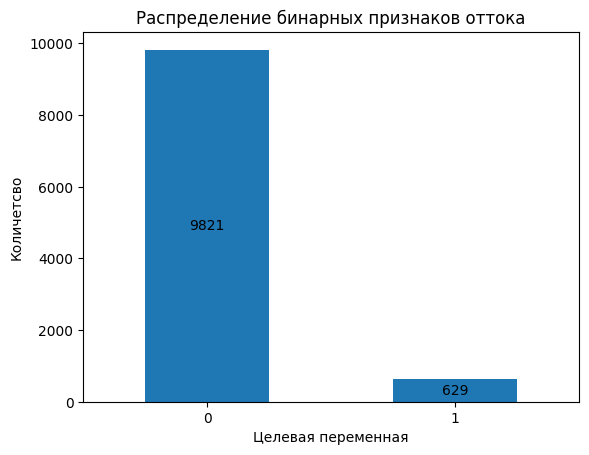

In [9]:
churn_counts = original_df['churn'].value_counts()

ax = churn_counts.plot(
    kind='bar',
    title='Распределение бинарных признаков оттока',
    xlabel='Целевая переменная',
    ylabel='Количетсво',
    rot=0
)

ax.bar_label(ax.containers[0], label_type='center')

plt.show()

In [10]:
print(f'Лояльные клиенты: {churn_counts[0] / churn_desc['count'] * 100:.0f}%')
print(f'Ушедшие клиенты: {churn_counts[1] / churn_desc['count'] * 100:.0f}%')

Лояльные клиенты: 94%
Ушедшие клиенты: 6%


Целевая переменная churn является бинарной и указывает на отток клиентов, что подтверждает необходимость обучать именно LogisticRegression.

В данных наблюдается сильный дисбаланс классов: 94% наблюдений относятся к классу с лояльными клиентами и только 6% - к классу с ушедшими клиентами.

Из-за такого соотношения стандартная метрика accuracy будет неинформативна. Для оценки качества модели следует использовать метрику, устойчивую к дисбалансу: PR-AUC.

---

3. Описание признаков

Признаки, которые стоит удалить: 
1. Идентификаторы
- user_id - модель может начать запоминать их вместо общих закономерностей, что приведет к переобучению
2. Мультиколлинеарность
- order_frequency_week и order_frequency_month - удалить order_frequency_week. Признак order_frequency_month более устойчивый к шуму.

- avg_order_value и median_order_value - удалить avg_order_value. Медиана более устойчива к выбросам.

- total_spent_last_week и total_spent_last_month - удалить order_frequency_week. total_spent_last_month - более стабильный и релевантный индикатор снижения вовлеченности.
    
    - review_rating_last_1 и review_rating_last_10 - стоит проверить два признака на их корреляцию между собой. Если окажется, что они друг на друга не влияют, то последний отзыв может говорить об эмоциональной реакции, а крайние 10 о стабильном, усредненном тренде.

Остальная фильтрация признаков будет на этапе просмотра корреляций.

In [11]:
df = original_df.copy()

df = df.drop(columns=['user_id', 'order_frequency_week', 'avg_order_value', 'total_spent_last_week'])

Удаление явных дубликатов

In [12]:
print('Число явных дубликатов:', df.duplicated().sum())

df = df.drop_duplicates()

Число явных дубликатов: 414


---

Создание копии датасета для EDA анализа

In [13]:
df_eda = df.copy()
temp_len = len(df_eda)

Обработка пропущенных значений

In [14]:
def show_missing_stats(df):
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': df.isna().sum(),
        'Доля пропусков': df.isna().mean() * 100
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    return missing_stats \
            .sort_values(by='Кол-во пропусков', ascending=False) \
            .style.format({'Доля пропусков': '{:.2f}%'}) \
            .background_gradient(cmap='coolwarm')

show_missing_stats(df_eda)

,Кол-во пропусков,Доля пропусков
seasonal_menu_tried,950,9.47%
days_since_last_order,902,8.99%
subscription_status,892,8.89%
app_opens_per_week,857,8.54%
review_rating_last_1,822,8.19%
median_order_value,804,8.01%
days_since_last_promo,698,6.95%
app_crashes_last_month,694,6.92%
review_rating_last_10,674,6.72%
seasons,654,6.52%


План обработки пропущенных значений: 

- seasonal_menu_tried - пользователь никогда не пробовал меню. Заполнить 0.

- days_since_last_order и days_since_last_promo - клиент никогда не заказывал/использовал промокод. Заполнить 0 нельзя (это будет значить заказывал/использовал сегодня), можно применить к признаку инверсию и перенести логику в recency_score, чем ближе его значение к 1, тем недавнее заказывали/использовали промокод. Формула расчета: 1 / (days + 1)

- subscription_status - пользователь не имеет платной подписки. Заполнить значением, которое уже есть в признаке - 'none'.

- app_opens_per_week - пользователь не пользовался приложением. Заполнить 0.

- review_rating_last_1 и review_rating_last_10 - заполнить средним + добавить флаг при обучении. Если отзыва нет, первое слагаемое станет медианой, а второе (флаг) скорректирует предсказание.

- median_order_value, order_frequency_month и total_spent_last_month - стоит заполнит 0-ом, так как это можно трактовать как отсутствие заказов.

- app_crashes_last_month - нет данных о крашах - приложение работало стабильно. Заполнить 0.

- coffee_bean_origin, seasons, last_drink_size, phone_type - создание отдельной категории для незаполненных категориальных данных 'unknown'. При этом на этапе обучения модели данные параметры будут переводиться через OneHotEncoder с параметром handle_unknown - ignore, чтобы учитывать в данных пропуски (получить вектор из 0).

- milk_preference - предпочтительное молоко у пользователя отсутствует. Заполнить существующей категорией 'none'.

- coffee_preference_change - предпочтения не менялись. Заполнить 0.

- notifications_enabled - у пользователя выключены уведомления. Заполнить 0.

- discount_usage_rate - скидками не пользовался. Заполнить 0.

- last_coffee_type, preferred_roast и geo_location - имеют <2.5% пропусков, пустые значения в данных признаках будут удалены.

Создание функции для инверсии

In [15]:
def inverse_transform(x):
    return 1 / (x + 1)

In [16]:
df_eda = df_eda.dropna(subset=['last_coffee_type', 'preferred_roast', 'geo_location'])

days_since_cols = ['days_since_last_order', 'days_since_last_promo']
num_cols = [*days_since_cols, 'total_spent_last_month', 'median_order_value', 'order_frequency_month', 'seasonal_menu_tried', 'app_opens_per_week', 'app_crashes_last_month', 'coffee_preference_change', 'notifications_enabled', 'discount_usage_rate']
df_eda[num_cols] = df_eda[num_cols].fillna(0)

df_eda[days_since_cols] = df_eda[days_since_cols].apply(inverse_transform)

cat_cols = ['coffee_bean_origin', 'seasons', 'last_drink_size', 'phone_type']
df_eda[cat_cols] = df_eda[cat_cols].fillna('unknown')

cat_cols_with_none = ['subscription_status', 'milk_preference']
df_eda[cat_cols_with_none] = df_eda[cat_cols_with_none].fillna('none')

review_cols = ['review_rating_last_1', 'review_rating_last_10']
df_eda[review_cols] = df_eda[review_cols].fillna(df_eda[review_cols].median())

show_missing_stats(df_eda)

'Пропусков в данных нет'

---

Анализ категориальных признаков

In [17]:
def check_cat_features(df_eda):
    cat_df = df_eda.select_dtypes(include=['object'])

    data = []
    for col in cat_df.columns:
        data.append({
            'Признак': col,
            'Уникальные значения': df_eda[col].unique(),
            'Кол-во': df_eda[col].nunique(),
        })

    return pd.DataFrame(data)

check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,last_coffee_type,"[blend, arabica, robusta]",3
1,preferred_roast,"[light, medium, dark]",3
2,milk_preference,"[almond, whole, oat, skim, soy, none]",6
3,coffee_bean_origin,"[vietnam, guatemala, brazil, colombia, kenya, ...",7
4,last_drink_size,"[large, medium, small, unknown]",4
5,subscription_status,"[pro, none, premium, basic]",4
6,seasons,"[summer, autumn, spring, winter, unknown]",5
7,phone_type,"[android, ios, web, unknown]",4
8,geo_location,"[geo_75, geo_95, geo_25, geo_2, geo_19, geo_68...",100


Большинство категориальных признаков имеют от 3 до 7 уникальных значений, что меньше 10, а значит к ним можно применить OneHotEncoder, который создаст новые признаки на их основе.

geo_location - единственный признак с большим числом уникальных значений (кол-во: 100). В данно случае нужно применить TargetEncoding, иначе он зашумит модель.

Данных в датасете достаточно, чтобы попробовать комбинации разных признаков

In [18]:
# Экономическая мотивация
df_eda['sub_size_interact'] = df_eda['subscription_status'] + '_' + df_eda['last_drink_size']

# Поведенческие паттерны
df_eda['season_size'] = df_eda['seasons'] + '_' + df_eda['last_drink_size']


In [19]:
check_cat_features(df_eda)

,Признак,Уникальные значения,Кол-во
0,last_coffee_type,"[blend, arabica, robusta]",3
1,preferred_roast,"[light, medium, dark]",3
2,milk_preference,"[almond, whole, oat, skim, soy, none]",6
3,coffee_bean_origin,"[vietnam, guatemala, brazil, colombia, kenya, ...",7
4,last_drink_size,"[large, medium, small, unknown]",4
5,subscription_status,"[pro, none, premium, basic]",4
6,seasons,"[summer, autumn, spring, winter, unknown]",5
7,phone_type,"[android, ios, web, unknown]",4
8,geo_location,"[geo_75, geo_95, geo_25, geo_2, geo_19, geo_68...",100
9,sub_size_interact,"[pro_large, none_medium, premium_small, none_l...",16


Новые признаки имеют больше 10 уникальных значений, значит пробразование через OHE не подойдёт, т.к. это раздует датасет. К этим новым параметрам можно применить Target Encoding.

Удаление признаков, которые не подходят для обучения будут удалены после проверки корреляции. Некоторые из категорий могут показаться не релевантными, но на деле будут влиять на предсказание решений клиента.

---

Анализ выбросов

In [20]:
df_eda.describe()

,days_since_last_order,order_frequency_month,median_order_value,total_spent_last_month,discount_usage_rate,seasonal_menu_tried,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,days_since_last_promo,coffee_preference_change,churn
count,9578.0,9578.000000,9578.000000,9578.000000,9578.000000,9578.0,9578.000000,9578.0,9578.000000,9578.000000,9578.0,9578.0,9578.0,9578.0
mean,0.439057,3.794617,415.525421,1882.118550,0.272966,0.633222,10.370472,0.714241,4.210124,4.016496,0.944769,0.247625,0.18104,0.060033
std,0.355027,2.905840,276.815033,2246.421580,0.164936,0.48195,14.320836,0.451799,0.755955,1.154396,1.007945,0.315779,0.385071,0.237561
min,0.02439,0.000000,-10.353340,-43.716463,0.000000,0.0,0.000000,0.0,1.415526,-0.897000,0.0,0.007092,0.0,0.0
25%,0.142857,1.681583,222.523045,575.697580,0.148424,0.0,5.288466,0.0,3.726205,3.290384,0.0,0.05,0.0,0.0
50%,0.333333,3.180939,378.794479,1246.240307,0.256293,1.0,8.712490,1.0,4.208192,3.988047,1.0,0.1,0.0,0.0
75%,1.0,5.274765,569.709534,2418.312267,0.380907,1.0,12.344026,1.0,4.680994,4.753401,2.0,0.25,0.0,0.0
max,1.0,27.389318,2189.101562,37965.684502,0.887301,1.0,224.587875,1.0,7.384425,8.558442,7.0,1.0,1.0,1.0


In [21]:
def create_df_boxplot(df, col=None, ax=None):
    data = df if col is None else df[col]
    
    if ax is None:
        _, ax = plt.subplots(figsize=(14, 8))
        standalone = True
    else:
        standalone = False
    
    sns.boxplot(data=data, ax=ax)
    
    title = 'Размах значений признака'
    if col is not None:
        title += f': {col}'

    ax.set_title(title)
    ax.set_ylabel('Значение признака')

    ax.grid(True)
    ax.tick_params(axis='x', rotation=30)
    
    if standalone:
        return plt.show()

    return ax

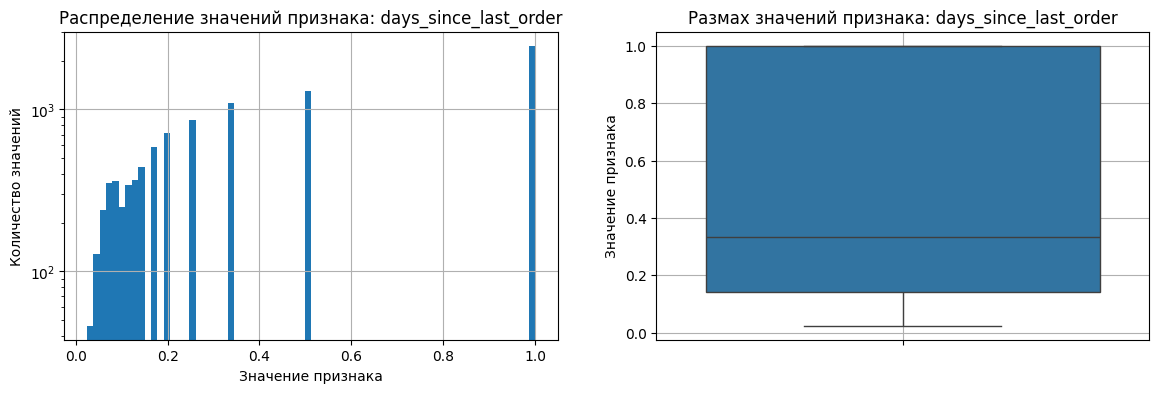

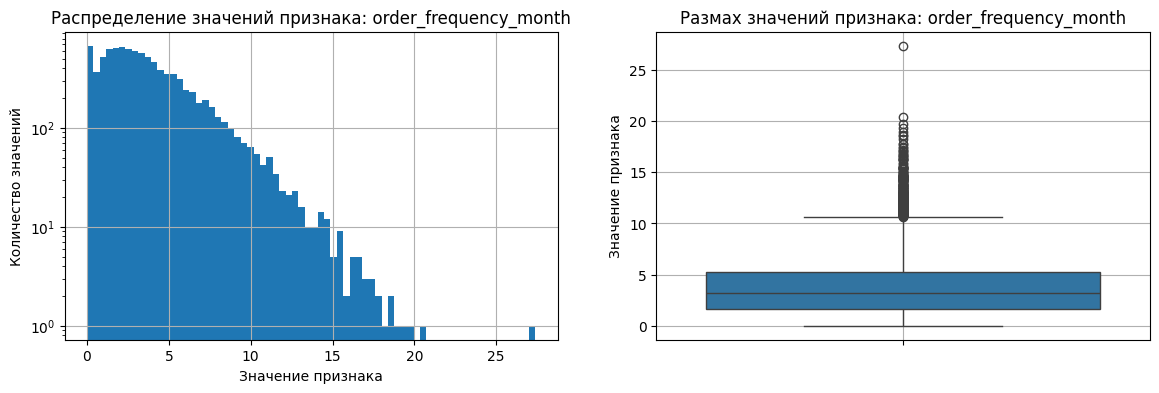

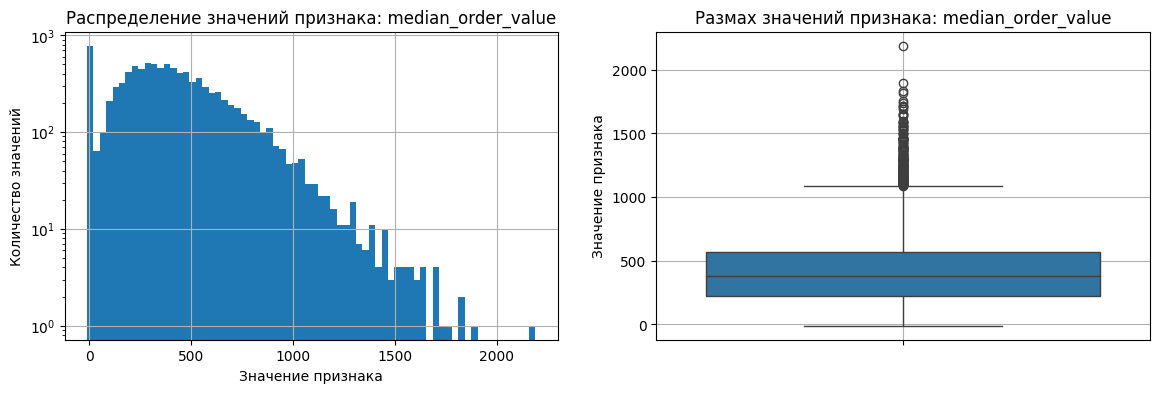

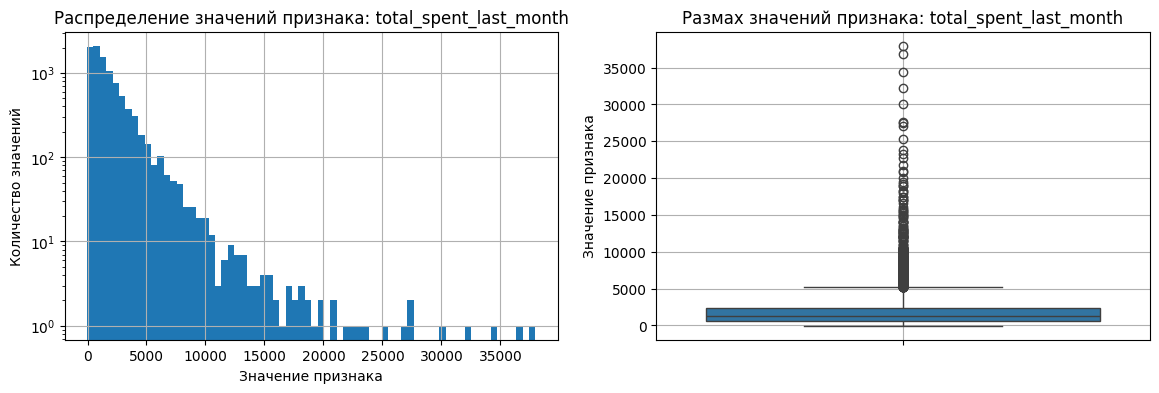

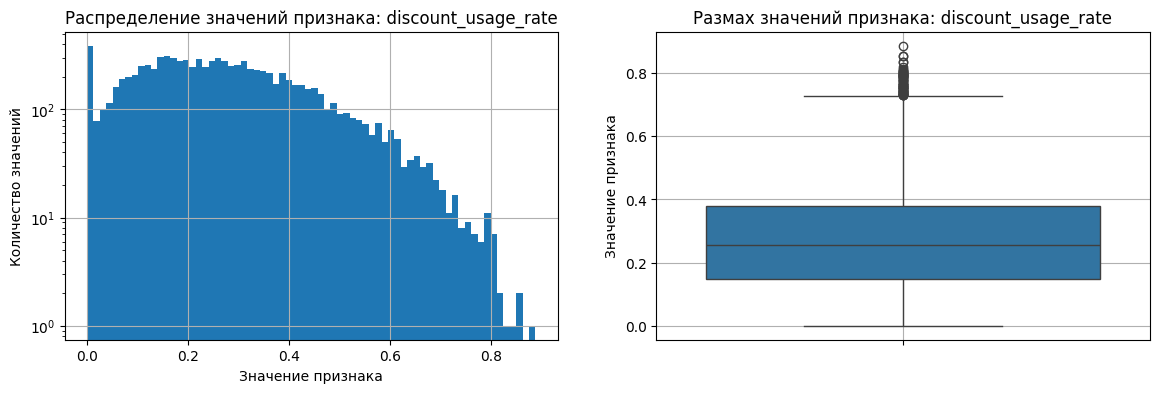

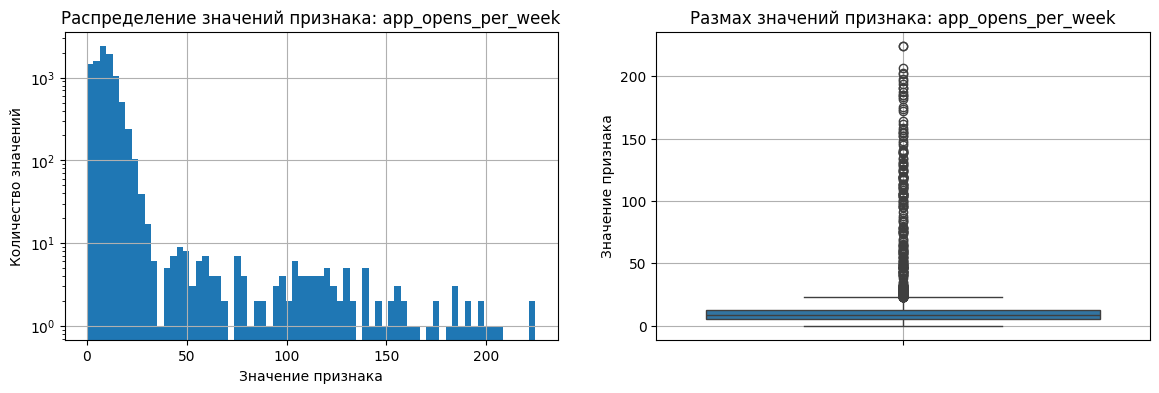

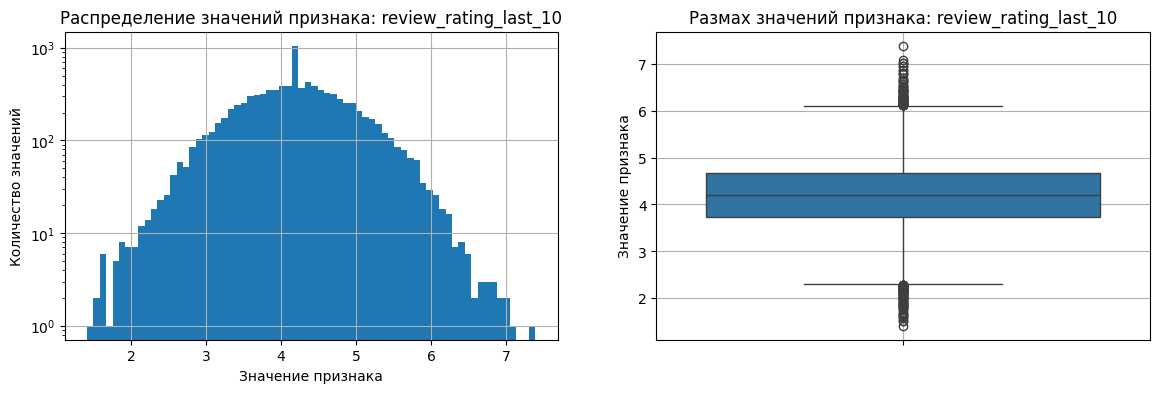

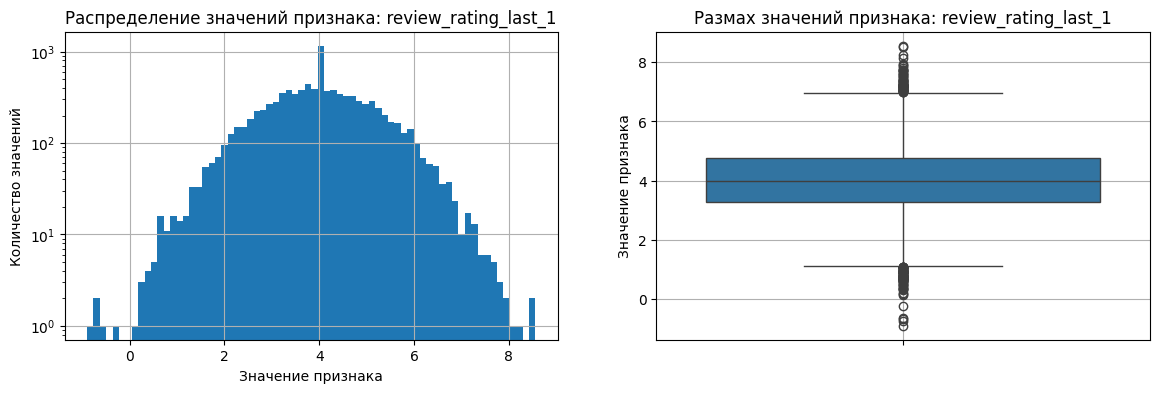

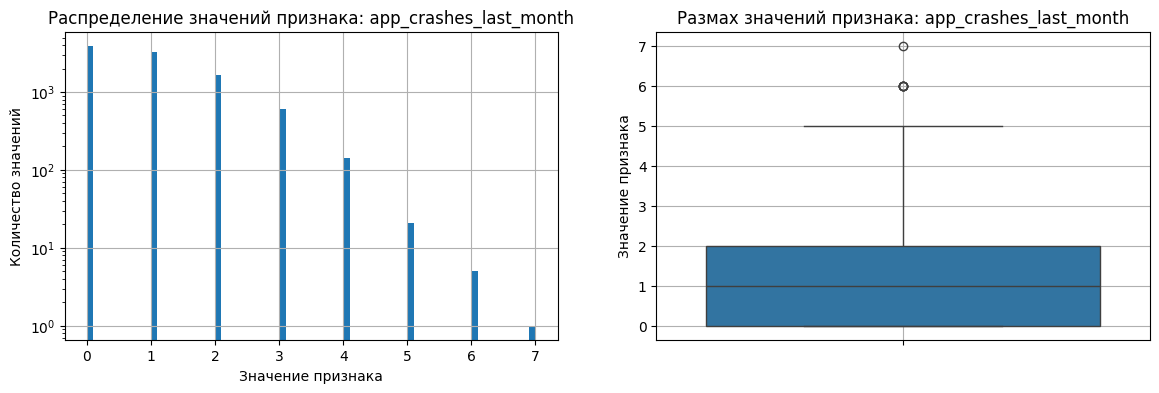

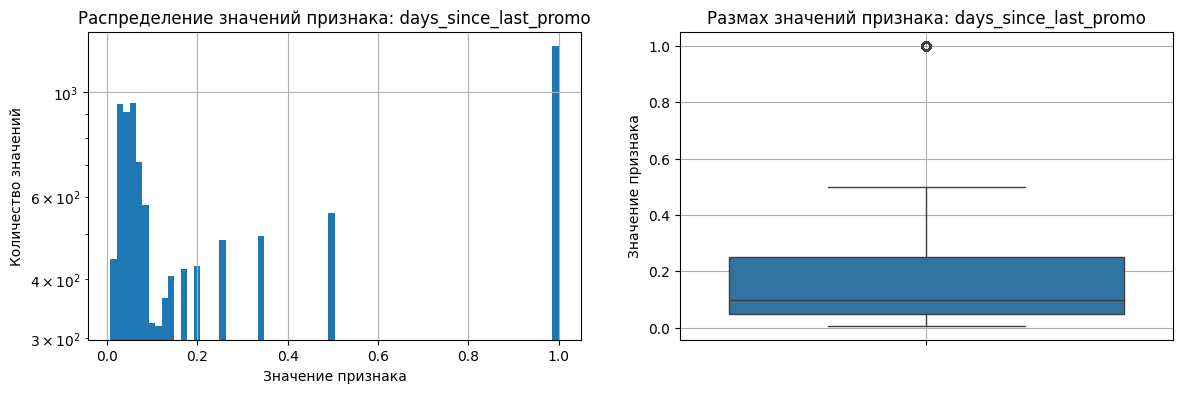

In [22]:
def get_non_binary_df(df):
    num_df = df.select_dtypes(include=['number'])
    return num_df.loc[:, ~num_df.isin([0, 1]).all()]

def get_emission_analysis(df):
    non_binary_df = get_non_binary_df(df)

    for col in non_binary_df.columns:
        _, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

        hist = axes[0]
        non_binary_df[col].plot(
            kind='hist',
            bins=70,
            grid=True,
            ax=hist
        )

        hist.set_title(f'Распределение значений признака: {col}')
        hist.set_xlabel('Значение признака')
        hist.set_ylabel('Количество значений')
        hist.set_yscale('log')

        create_df_boxplot(non_binary_df, col, axes[1])

        plt.show()
        
get_emission_analysis(df_eda)

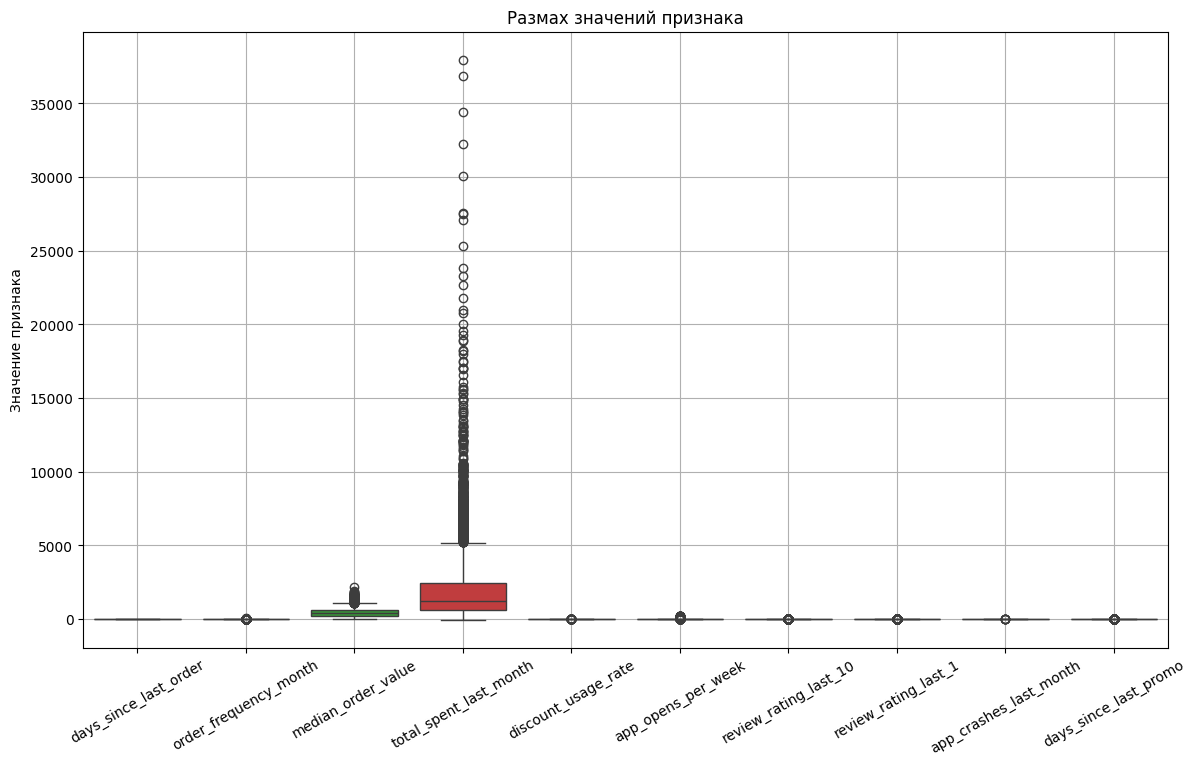

In [23]:
non_binary_df = get_non_binary_df(df_eda)

create_df_boxplot(non_binary_df)

В датасете есть строки, где числовое значение - отрицательное, что говорит об явной ошибке, поэтому такие данные стоит исключить.

In [24]:
for col in non_binary_df.columns:
    df_eda[col] = df_eda[col].clip(lower=0)

Кроме того, все признаки имеют выбросы. При попытке провести clipping, это приведёт лишь к уменьшению датасета. И данная практика не будет правильной, т.к. удаление значений выше 99 процентиля ведёт к тому, что модель научится на среднем классе, но она не сможет предсказывать поведение VIP-сегмента. В таком случае стоит провести добавление новых признаков, которые уберут выбросы и сделают распределение похожим на нормальное без удаления данных.

- Логарифмирование применяется к денежным метрикам с тяжелым хвостом (total_spent_last_month, median_order_value, app_opens_per_week)

In [25]:
heavy_tailed_cols = ['total_spent_last_month', 'median_order_value', 'app_opens_per_week', 'order_frequency_month']
for col in heavy_tailed_cols:
    df_eda[f'{col}_log'] = np.log1p(df_eda[col])

df_eda = df_eda.drop(columns=heavy_tailed_cols)

df_eda.head()

,days_since_last_order,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn,sub_size_interact,season_size,total_spent_last_month_log,median_order_value_log,app_opens_per_week_log,order_frequency_month_log
0,1.0,0.337031,blend,light,almond,0,vietnam,large,pro,1,5.176792,3.302238,0,summer,0.142857,android,0,geo_75,1,pro_large,summer_large,8.036247,5.566989,3.448981,2.634943
1,0.333333,0.547659,arabica,light,whole,1,guatemala,medium,none,1,4.392991,3.988047,0,autumn,0.058824,ios,0,geo_95,0,none_medium,autumn_medium,6.907136,6.294524,0.000000,0.943574
2,0.083333,0.120258,arabica,medium,oat,1,guatemala,small,premium,1,4.977713,4.379219,0,spring,0.083333,web,1,geo_25,0,premium_small,spring_small,7.192288,6.158026,2.938931,1.385461
3,1.0,0.000000,robusta,medium,skim,0,brazil,medium,none,1,3.712526,3.043617,0,summer,0.25,android,0,geo_2,0,none_medium,summer_medium,8.006577,6.564602,2.518142,1.667566
4,0.25,0.074990,robusta,dark,almond,1,colombia,medium,none,0,4.528271,5.642993,1,winter,0.066667,ios,0,geo_19,1,none_medium,winter_medium,9.033452,7.090387,2.830164,2.110197


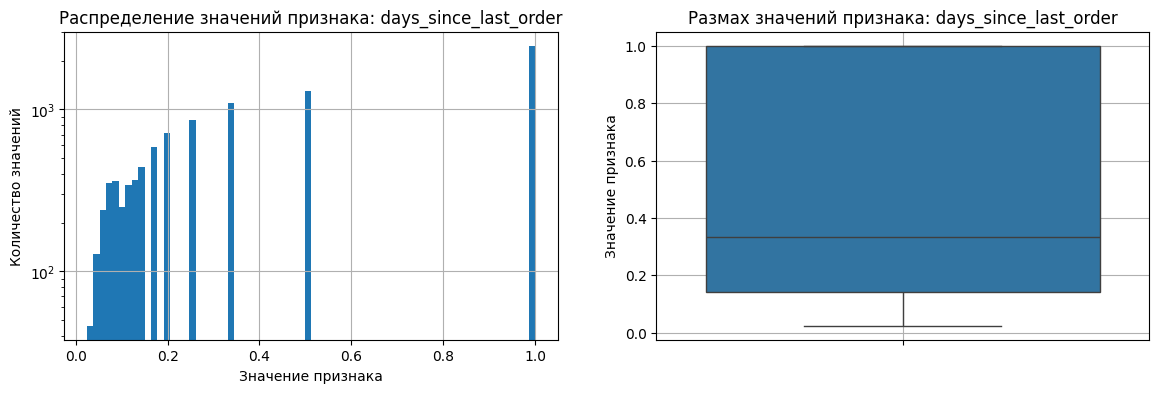

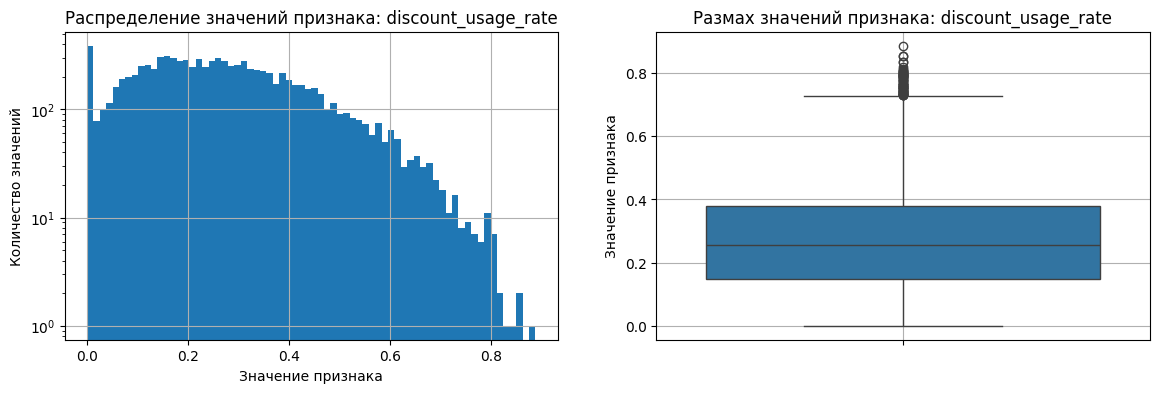

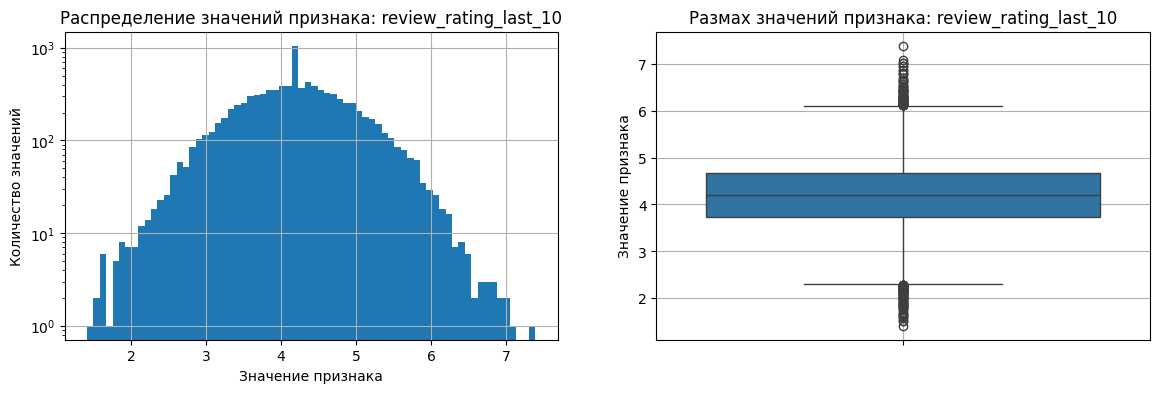

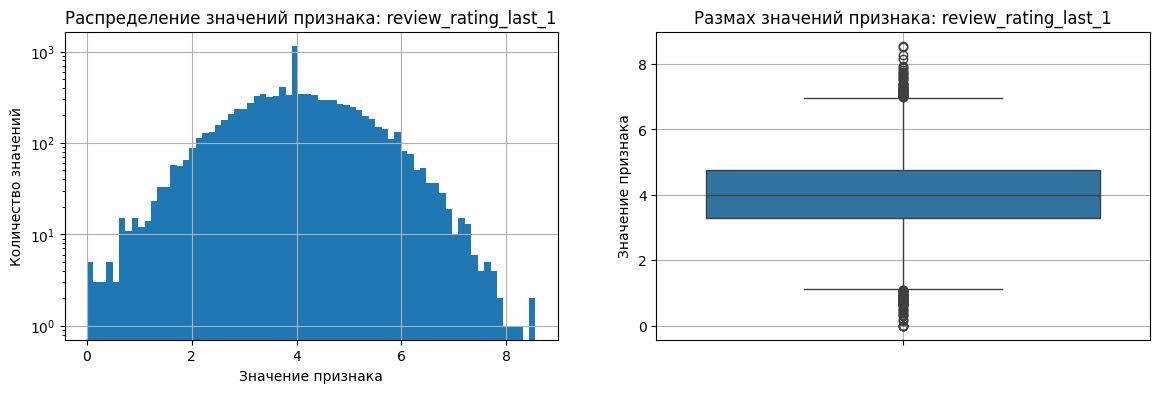

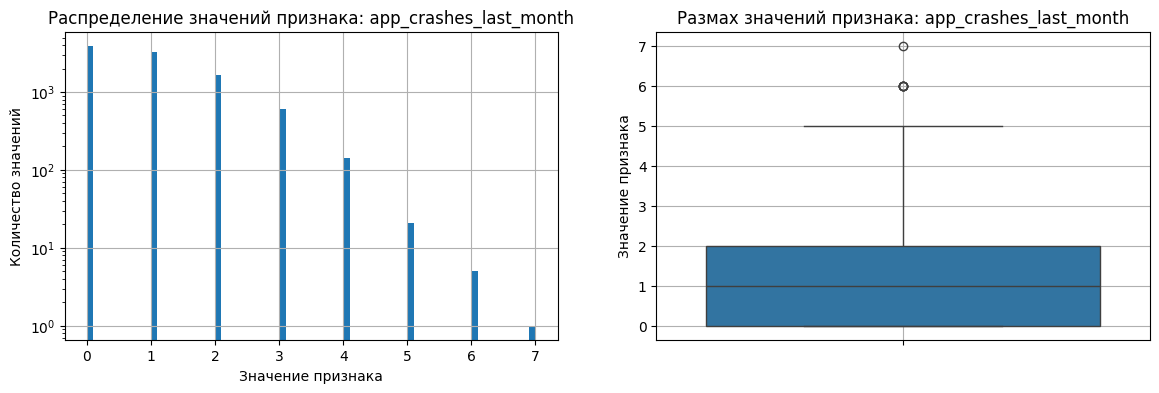

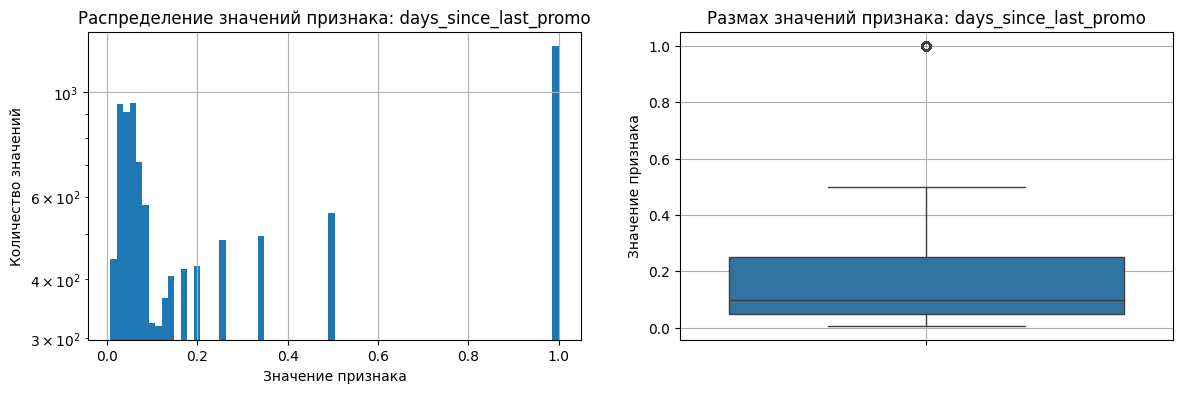

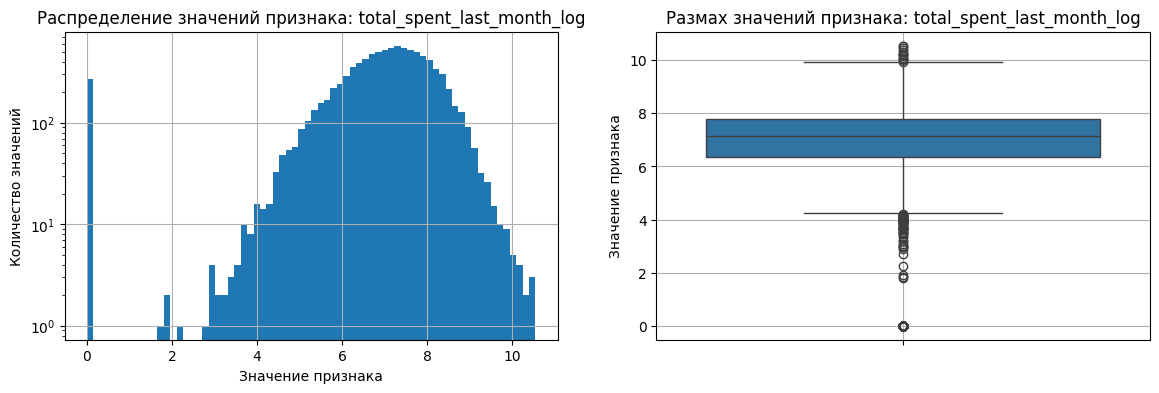

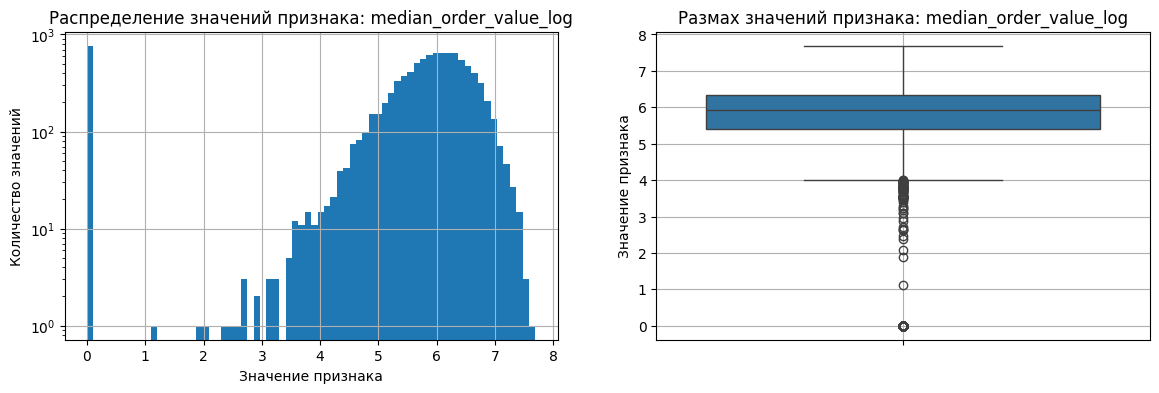

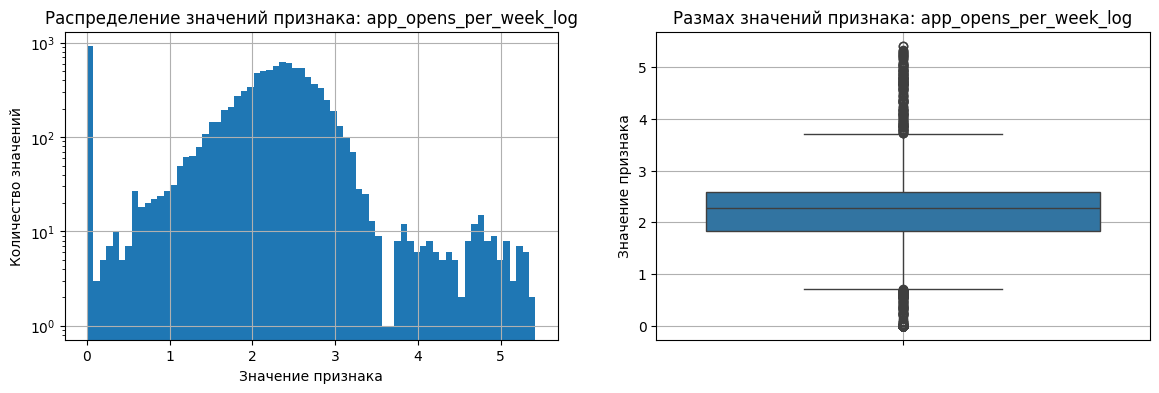

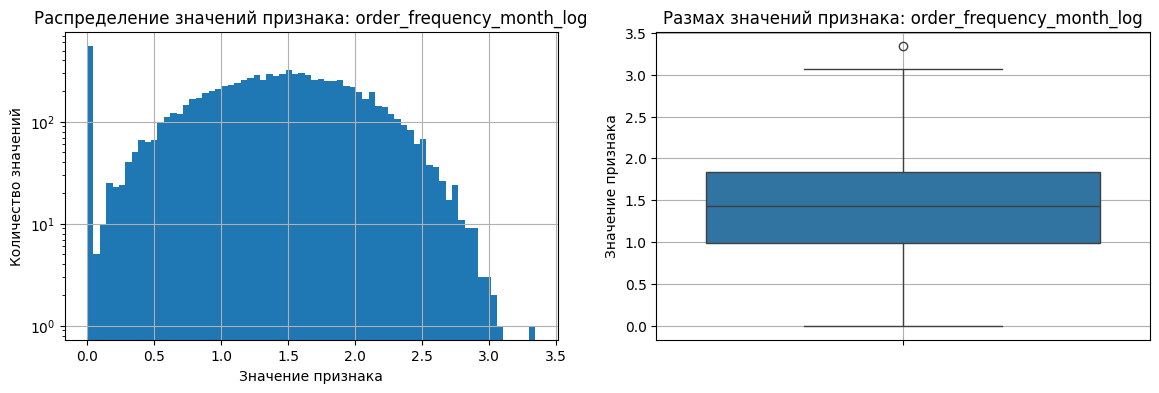

In [26]:
get_emission_analysis(df_eda)

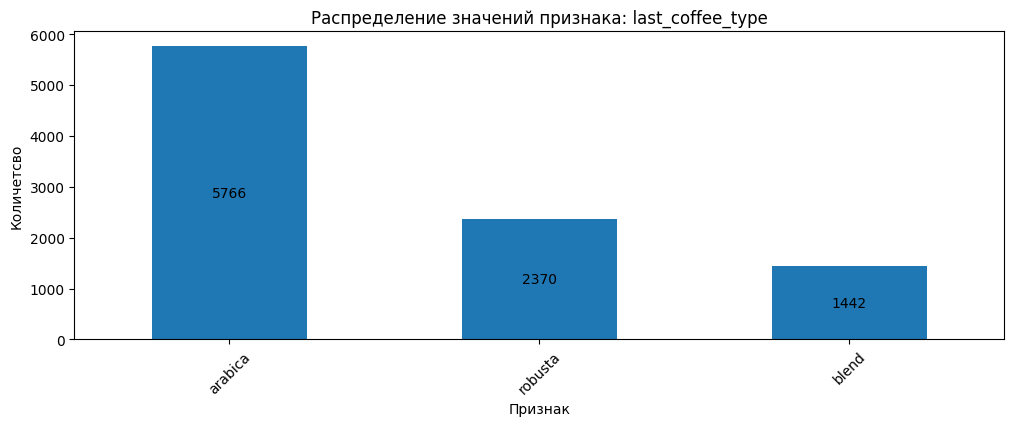

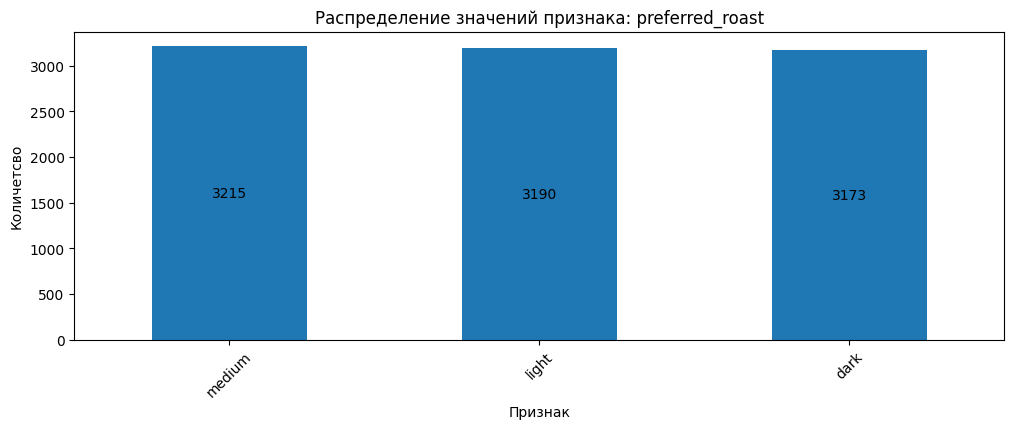

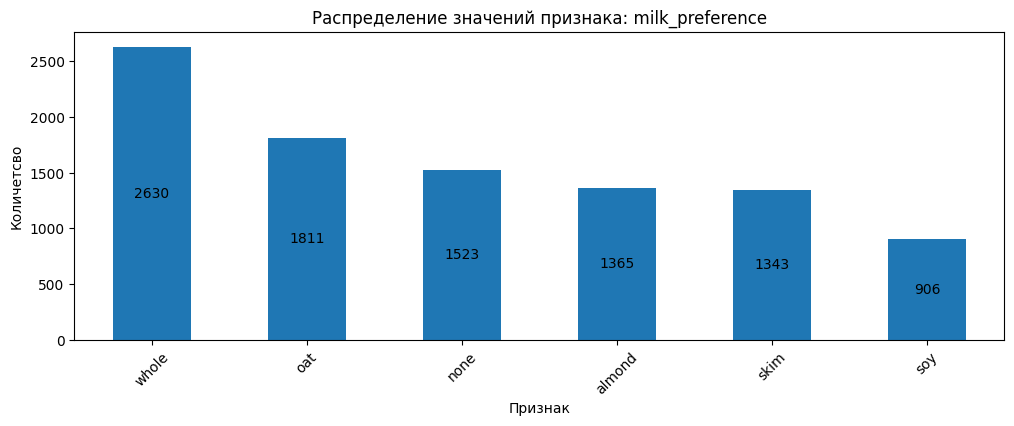

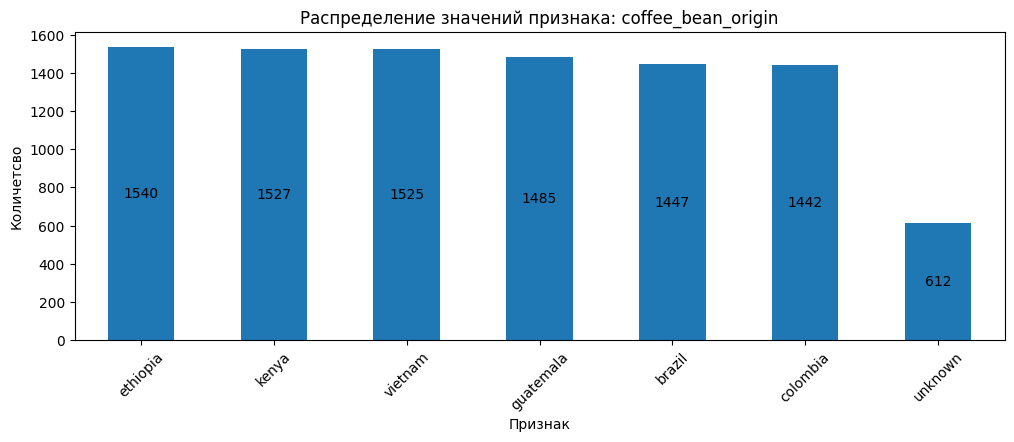

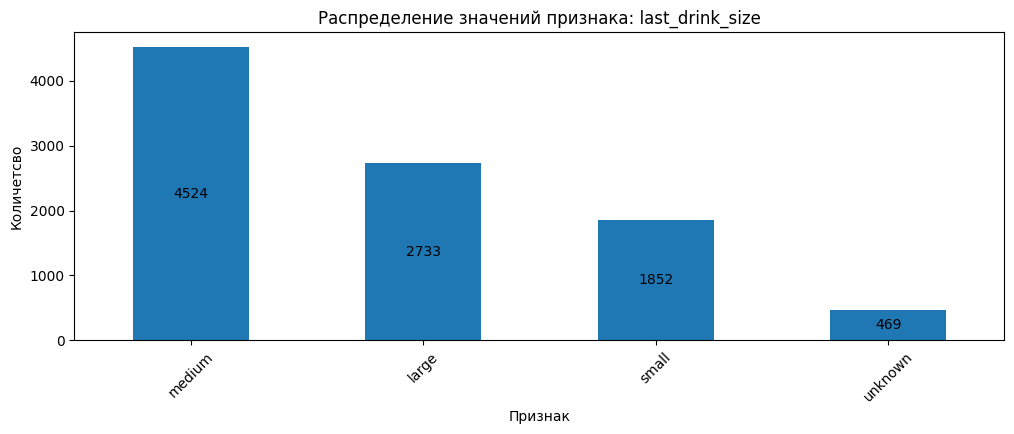

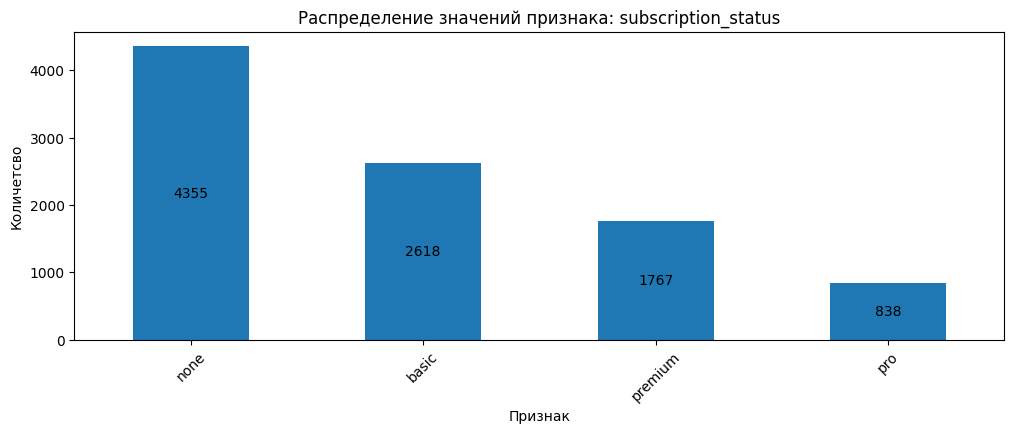

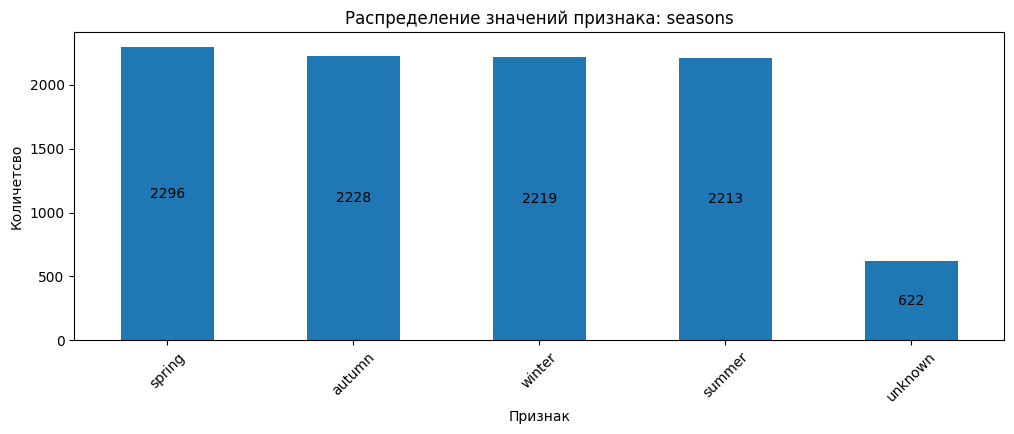

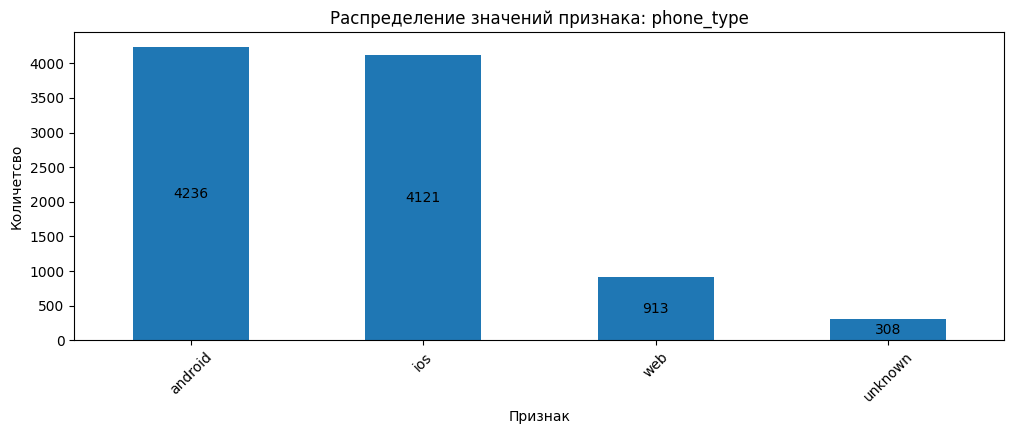

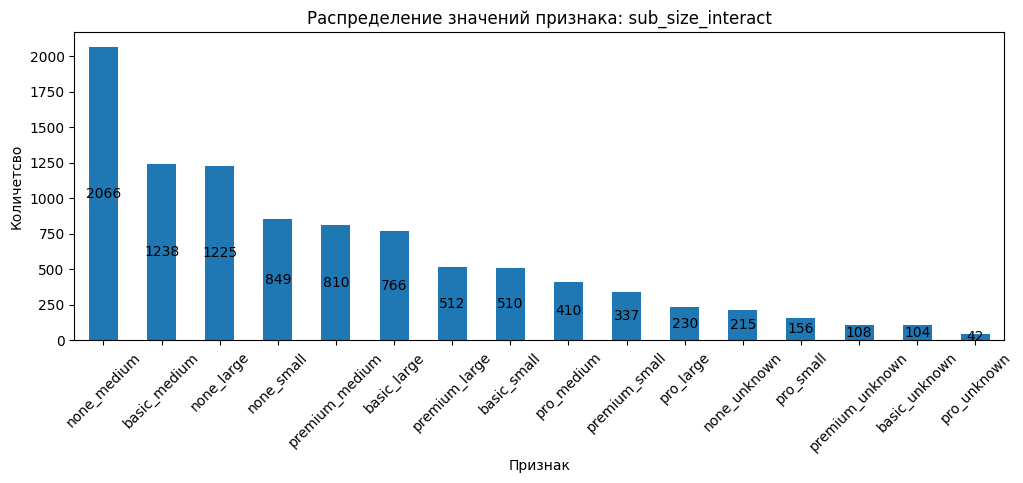

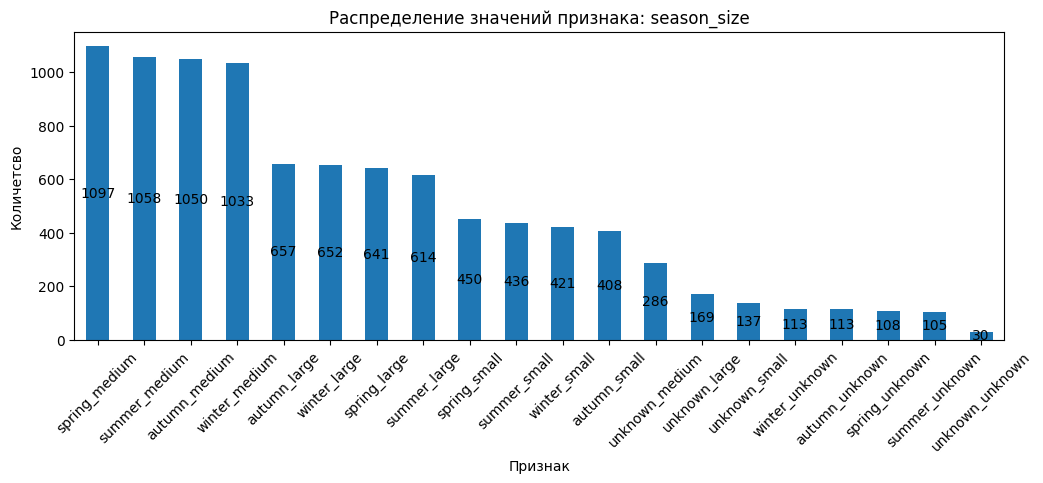

In [27]:
cat_df = df_eda.select_dtypes(include=['object'])
non_location_df = cat_df.drop(columns='geo_location')

for col in non_location_df.columns:
    ax = non_location_df[col].value_counts().plot(
        kind='bar',
        title=f'Распределение значений признака: {col}',
        xlabel='Признак',
        ylabel='Количетсво',
        figsize=(12, 4),
        rot=45
    )

    ax.bar_label(ax.containers[0], label_type='center')

    plt.show()

In [28]:
after = len(df_eda)
print(" Было строк в исходном датасете:", temp_len,
      '\n', "Осталось строк в датасете после обработки:", after,
      '\n', "Удалено строк в датасете после обработки:", temp_len-after,
      '\n', f"Процент потерь: {(temp_len-after)/temp_len*100:.2f}%")

 Было строк в исходном датасете: 10036 
 Осталось строк в датасете после обработки: 9578 
 Удалено строк в датасете после обработки: 458 
 Процент потерь: 4.56%


Итог EDA

**Удалены признаки:** id, binomial_name, registration number, measure_count, timestamp.

**Обработка:**
- weight: удалены 3 NaN-строки.
- shell_crack: удален (~76% пропусков).
- Остальные пропуски пренебрегаемы (заполнение добавит шум).
- Дубликаты: 328 явных удалено.
- Выбросы: shell_length и shell_width (ошибочный перевод в см волонтером), weight=0 — исключены.

**Статистика:** 2829 => 2393 строк (удалено 436, 15.41%).

---

In [29]:
def create_heatmap(corr, title, ax=None):
    if ax is None:
        plt.figure(figsize=(6, 5))
        ax = plt.gca()

    sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=.5,
        cbar=False,
        ax=ax
    )
    
    ax.set_title(title)
    
    if len(ax.figure.get_axes()) == 1:
        plt.show()

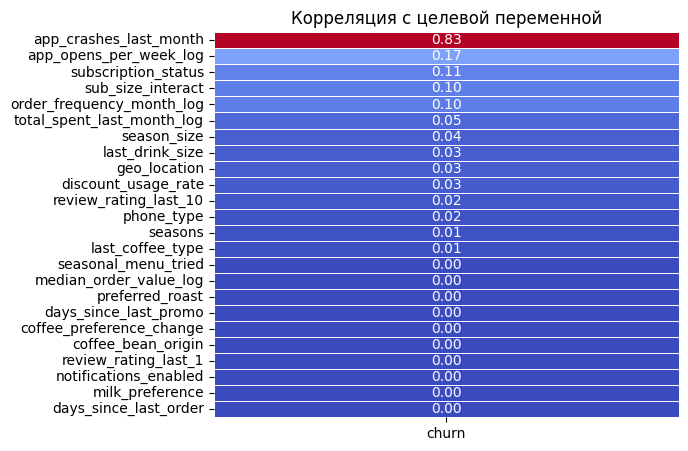

In [30]:
corr_matrix = df_eda.phik_matrix(njobs=1, interval_cols=['days_since_last_order', 'discount_usage_rate', 'seasonal_menu_tried', 'notifications_enabled', 'review_rating_last_10', 'review_rating_last_1', 'app_crashes_last_month', 'days_since_last_promo', 'coffee_preference_change', 'churn', 'total_spent_last_month_log', 'median_order_value_log', 'app_opens_per_week_log', 'order_frequency_month_log'])
target_correlation = corr_matrix[corr_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной')

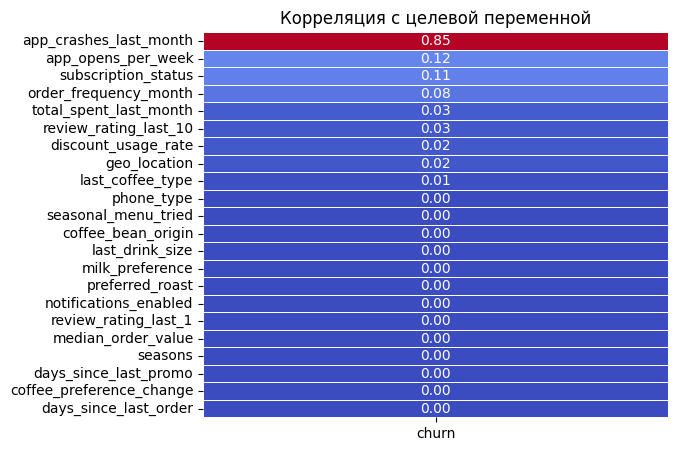

In [31]:
corr_matrix = df.phik_matrix(njobs=1, interval_cols=['days_since_last_order', 'order_frequency_month', 'median_order_value', 'total_spent_last_month', 'discount_usage_rate', 'seasonal_menu_tried', 'app_opens_per_week', 'notifications_enabled', 'review_rating_last_10', 'review_rating_last_1', 'app_crashes_last_month', 'days_since_last_promo', 'coffee_preference_change', 'churn'])
target_correlation = corr_matrix[corr_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

create_heatmap(target_correlation, title='Корреляция с целевой переменной')


6. Проанализируйте выбросы.

   - Определите, как они влияют на данные.

   - Выберите способ, которым их можно обработать.

7. Посчитайте корреляции между признаками. Постройте необходимые визуализации. Определите, есть ли признаки, которые можно убрать, на основании их корреляции с другими.

8. Напишите выводы по результатам исследовательского анализа данных.

1. Улучшения (Успех) ✅

В большинстве случаев корреляция выросла. Это значит, что новые признаки стали информативнее для модели.

    app_opens_per_week (0.116 -> 0.173):
    Логарифмирование (_log) сработало отлично! Рост корреляции на ~50%. Это подтверждает гипотезу, что важен порядок величины активности, а не точное число.

    total_spent_last_month (0.031 -> 0.050):
    Логарифм трат стал сильнее связан с оттоком. Это классика: разница в тратах на низких уровнях важнее, чем на высоких.

    order_frequency_month (0.080 -> 0.095):
    Та же история. Логарифм частоты лучше предсказывает отток.

    median_order_value (0.000 -> 0.017):
    Раньше корреляция была нулевой (мусор), теперь появилась хоть какая-то связь.

2. Странная ситуация с app_crashes (Внимание!) ⚠️

    Было: app_crashes_last_month = 0.853 (Колоссальная связь!)

    Стало: app_crashes_last_month_bin = 0.369 (Упала более чем в 2 раза)

Что произошло?
Биннинг (превращение числа в категории Zero/Low/Critical) "убил" часть информации.

    Гипотеза 1 (Data Leakage в оригинале): Корреляция 0.85 — это подозрительно много для реальной жизни. Возможно, в исходных данных была прямая зависимость (например, "если крэшей > 10, то churn=1" по правилам системы). Если так, то падение корреляции — это хорошо, вы убрали утечку данных и сделали модель более робастной.

    Гипотеза 2 (Слишком грубый биннинг): Возможно, разница между 5 и 20 крэшами все-таки важна, а вы слили их в одну категорию "Critical".

Рекомендация:
Для app_crashes оставьте оба варианта: и исходный числовой столбец, и бинарный/категориальный. Пусть модель (особенно если это дерево) сама выберет, что ей полезнее. Если вы используете линейную модель, попробуйте сделать биннинг более детальным или верните логарифм количества крэшей.
3. Остальные признаки

    subscription_status (0.105): Стабилен, трансформация не повлияла (логично).

    review_rating_last_10 (0.025 -> 0.021): Чуть упала, но незначительно. Средний рейтинг — слабый предиктор в обоих случаях.

    Нулевые корреляции: days_since_last_order, days_since_last_promo и другие так и остались нулями. Это значит, что линейной связи там нет. 

## Этап 3. Предобработка данных

1. Разделите данные в пропорции 80 к 20. 20% данных отложите для теста. Остальные используйте для обучения и кросс-валидации модели.

2. Предобработайте данные. Используйте информацию о пропусках и категориальных признаках только из обучающей выборки.

   - Создайте пайплайн, который обработает пропуски и выбросы.

   - Создайте пайплайн, который обработает категориальные признаки.

   - Создайте пайплайн, который обработает числовые признаки: проведёт масштабирование и нормализацию.



In [32]:
non_binary_df = get_non_binary_df(df)
for col in non_binary_df.columns:
    df[col] = df[col].clip(lower=0)

In [33]:
df.head()

,days_since_last_order,order_frequency_month,median_order_value,total_spent_last_month,discount_usage_rate,last_coffee_type,preferred_roast,milk_preference,seasonal_menu_tried,coffee_bean_origin,last_drink_size,subscription_status,app_opens_per_week,notifications_enabled,review_rating_last_10,review_rating_last_1,app_crashes_last_month,seasons,days_since_last_promo,phone_type,coffee_preference_change,geo_location,churn
0,0,12.942519,260.645081,3089.991009,0.337031,blend,light,almond,<NA>,vietnam,large,pro,30.468321,1,5.176792,3.302238,<NA>,summer,6,android,0,geo_75,1
1,2,1.569146,540.597839,998.380941,0.547659,arabica,light,whole,1,guatemala,medium,none,NaN,1,4.392991,NaN,0,autumn,16,ios,0,geo_95,0
2,11,2.996666,471.494568,1328.140204,0.120258,arabica,medium,oat,1,guatemala,small,premium,17.895638,1,4.977713,4.379219,0,spring,11,web,1,geo_25,0
3,0,4.299255,708.529785,2999.628366,NaN,robusta,medium,skim,0,brazil,medium,none,11.405533,1,3.712526,3.043617,0,summer,3,android,0,geo_2,0
4,3,7.249865,1199.372925,8377.729478,0.074990,robusta,dark,almond,1,colombia,medium,none,15.948238,0,4.528271,5.642993,1,winter,14,ios,0,geo_19,1


In [34]:
def split_df(df):
    X = df.drop(columns='churn')
    y = df['churn']

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X,
        y,
        test_size=.2,
        stratify=y,
        shuffle=True,
        random_state=RANDOM_STATE
    )

    print(f"Размер обучающей выборки: {X_train_val.shape}")
    print(f"Размер тестовой выборки: {X_test.shape}")
    print(f"Доля положительного класса в train: {y_train_val.mean():.3f}")
    print(f"Доля положительного класса в test: {y_test.mean():.3f}")
    
    return X_train_val, X_test, y_train_val, y_test

In [35]:
X_train_val, X_test, y_train_val, y_test = split_df(df)

Размер обучающей выборки: (8028, 22)
Размер тестовой выборки: (2008, 22)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


In [57]:
@dataclass
class FeatureConfig:
    numeric: List[str]
    categorical: List[str]
    days_since: List[str] = field(default_factory=list)
    reviews: List[str] = field(default_factory=list)
    cat_with_none: List[str] = field(default_factory=list)
    target_enc: List[str] = field(default_factory=list)
    crashes_cols: List[str] = field(default_factory=list)
    log_cols: List[str] = field(default_factory=list)
    sq_cols: List[str] = field(default_factory=list)
    interaction_pairs: List[tuple] = field(default_factory=list)

def combine_columns(x):
    return pd.DataFrame(x).astype(str).agg('_'.join, axis=1).values.reshape(-1, 1)

def bin_crashes(x):
    if not isinstance(x, pd.DataFrame):
        x = pd.DataFrame(x, columns=[f"x{i}" for i in range(x.shape[1])])

    bins = [-np.inf, 1, 2, np.inf]
    labels = ['zero', 'low', 'high']
    
    out_df = pd.DataFrame(index=x.index)
    for col in x.columns:
        out_df[f"{col}_cat"] = pd.cut(x[col], bins=bins, labels=labels, right=True)

    return out_df.astype(object)

def get_binned_names(transformer, input_features):
    if hasattr(transformer, "feature_names_in_"):
        input_features = transformer.feature_names_in_
    else:
        n_features = getattr(transformer, "n_features_in_", 1) 
        input_features = [f"x{i}" for i in range(n_features)]
    return [f"{col}_cat" for col in input_features]

def get_combine_names(_, input_features):
    return ["_".join(input_features) + "_combined"]

def create_preprocessor(cfg: FeatureConfig, use_interactions=False):
    num_exceptions = set(
        cfg.log_cols + 
        cfg.sq_cols + 
        cfg.days_since + 
        cfg.reviews + 
        cfg.crashes_cols
    )
    
    cat_exceptions = set(
        cfg.cat_with_none +
        cfg.target_enc
    )
    
    standard_num_cols = [c for c in cfg.numeric if c not in num_exceptions]
    standard_cat_cols = [c for c in cfg.categorical if c not in cat_exceptions]

    transformers = [
        ('num', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
            StandardScaler()
        ), standard_num_cols),
        
        ('ohe', OneHotEncoder(handle_unknown='ignore'), standard_cat_cols)
    ]

    if len(cfg.days_since) > 0:
        transformers.append(('inverse', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
            FunctionTransformer(inverse_transform, feature_names_out="one-to-one")
        ), cfg.days_since)),

    if len(cfg.reviews) > 0:
        transformers.append(('review', make_pipeline(
            SimpleImputer(strategy='mean', add_indicator=True),
            StandardScaler()
        ), cfg.reviews)),
        
    if len(cfg.cat_with_none) > 0:
        transformers.append(('cat_none', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='none'),
            OneHotEncoder(handle_unknown='ignore')
        ), cfg.cat_with_none)),
        
    if len(cfg.target_enc) > 0:
        transformers.append(('target', make_pipeline(
            SimpleImputer(strategy='constant', fill_value='unknown'),
            TargetEncoder(), 
        ), cfg.target_enc)),
        
    if len(cfg.crashes_cols) > 0:
        transformers.append(('crashes', make_pipeline(
            SimpleImputer(strategy='constant', fill_value=0),
            FunctionTransformer(bin_crashes, validate=False, feature_names_out=get_binned_names),
            OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        ), cfg.crashes_cols))

    if use_interactions:
        if len(cfg.interaction_pairs) > 0:
            for i, pair in enumerate(cfg.interaction_pairs):
                transformers.append((
                    f'interact_{i}', 
                    make_pipeline(
                        SimpleImputer(strategy='constant', fill_value='unknown'),
                        FunctionTransformer(combine_columns, feature_names_out=get_combine_names),
                        TargetEncoder()
                    ), 
                    list(pair)
                ))
            
        if len(cfg.log_cols) > 0:
            transformers.append(('log', make_pipeline(
                SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
                FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
                StandardScaler()
            ), cfg.log_cols))

        if len(cfg.sq_cols) > 0:
            transformers.append(('sq', make_pipeline(
                SimpleImputer(strategy='constant', fill_value=0, add_indicator=True),
                FunctionTransformer(np.square, feature_names_out="one-to-one"),
                StandardScaler()
            ), cfg.sq_cols))

    return ColumnTransformer(transformers=transformers, remainder='drop')

In [58]:
def build_pipeline(cfg: FeatureConfig, use_interactions=False):
    return Pipeline([
        ('preprocessor', create_preprocessor(cfg, use_interactions)),
        ('model', LogisticRegression(random_state=RANDOM_STATE))
    ])

In [217]:
def extract_feature_importance(results):
    estimators = results['estimator']
    
    coefs_list = []
    
    for pipe in estimators:
        model = pipe[-1] 

        feature_names = pipe[:-1].get_feature_names_out()
        
        weights = model.coef_[0]
        
        coefs_list.append(pd.Series(weights, index=feature_names))

    df_coefs = pd.DataFrame(coefs_list).mean(axis=0).to_frame(name="importance")
    
    df_coefs['abs_importance'] = df_coefs['importance'].abs()
    
    importance_df = df_coefs.sort_values(by='abs_importance', ascending=False)
    
    print("Топ-5 наиболее влиятельных признаков")
    display(importance_df.head(5))
    
    print("Топ-5 наименее влиятельных признаков")
    display(importance_df.tail(5))

In [218]:
def create_PR_curve_graph(y_true, y_proba, score, name):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR-кривая (AUC = {score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall кривая: {name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [219]:
def evaluate_model(pipeline, X, y, cv, name="Model"):
    results = cross_validate(
        pipeline, 
        X, 
        y, 
        cv=cv, 
        scoring=["average_precision"],
        return_estimator=True
    )
    score = results["test_average_precision"].mean()
    
    y_proba = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')[:, 1]    
    create_PR_curve_graph(y, y_proba, score, name)
    
    print(f"[{name}] PR-AUC: {score:.4f}")
    
    model_class_name = pipeline.__class__.__name__
    if model_class_name != "DummyClassifier":
        return extract_feature_importance(results)

    return None

In [220]:
config = FeatureConfig(
    numeric=non_binary_df.columns,
    categorical=df.select_dtypes(include=['object']).columns,
    days_since=days_since_cols,
    reviews=review_cols,
    cat_with_none=cat_cols_with_none,
    target_enc=['geo_location'],
)

In [221]:
preprocessor = create_preprocessor(config)
pd.DataFrame(preprocessor.fit_transform(X_train_val, y_train_val))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,-0.228712,0.642901,-0.144180,-1.027667,0.756687,-0.391786,-1.578592,0.058785,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.071429,1.0,1.0,0.392534,-0.410212,-0.298552,-0.270139,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.071738
1,-0.736461,-1.147777,-0.712162,0.245398,0.756687,-0.438778,0.633476,2.045846,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.062500,1.0,1.0,0.423309,-0.581874,-0.298552,-0.270139,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025087
2,1.664425,-1.167348,-0.446932,0.923661,0.756687,0.922850,0.633476,-0.934745,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.083333,0.043478,1.0,1.0,0.000000,0.235931,3.349504,-0.270139,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050862
3,-1.313848,-1.046580,-0.559505,1.041369,0.756687,0.426174,0.633476,1.052315,-0.470687,4.051459,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.166667,0.062500,1.0,1.0,-1.336416,0.095812,-0.298552,-0.270139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041767
4,-1.062320,-1.505574,-0.709895,1.334721,0.756687,-0.252084,0.633476,0.058785,2.124556,-0.246825,3.397609,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.111111,1.0,1.0,-0.062796,-1.153879,-0.298552,-0.270139,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.071738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,-0.536628,-0.035763,-0.407338,-0.031929,0.756687,0.038661,0.633476,-0.934745,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,3.658838,-0.249371,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.111111,1.0,1.0,-1.628210,-1.585194,-0.298552,-0.270139,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050862
8024,0.206992,-1.163273,-0.609213,0.922754,0.756687,-0.117186,0.633476,-0.934745,2.124556,-0.246825,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,1.000000,0.5,0.5,-1.125961,1.943437,-0.298552,-0.270139,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.069355
8025,-1.313848,-0.675212,-0.526628,-0.135392,-1.321550,-0.237210,0.633476,0.058785,-0.470687,4.051459,-0.294325,-0.17174,-0.199403,-0.323135,-0.307374,-0.230197,-0.273311,-0.249371,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.031250,1.0,1.0,0.934395,-1.038656,-0.298552,-0.270139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.034312
8026,0.302456,0.058808,0.033874,-1.141668,-1.321550,0.150418,0.633476,-0.934745,-0.470687,-0.246825,-0.294325,-0.17174,-0.199403,3.094685,-0.307374,-0.230197,-0.273311,4.010094,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.250000,0.166667,1.0,1.0,-0.845

## Этап 4. Обучение модели

1. Обучите базовую версию модели.
   - Используйте для этого простые статистические модели.

   - Используйте кросс-валидацию для обучения модели.

2. Посчитайте метрики, поставленные в задаче. Опираясь на них, сделайте вывод о качестве модели.

In [222]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

Создание Dummy модель для получения нижней границы всех моделей

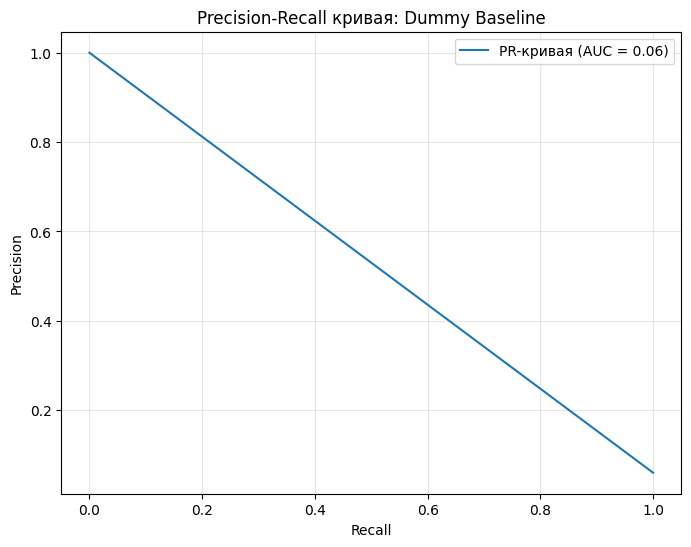

[Dummy Baseline] PR-AUC: 0.0600


In [223]:
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
evaluate_model(baseline, X_train_val, y_train_val, cv, name="Dummy Baseline")

Создание базовой модели без новых признаов

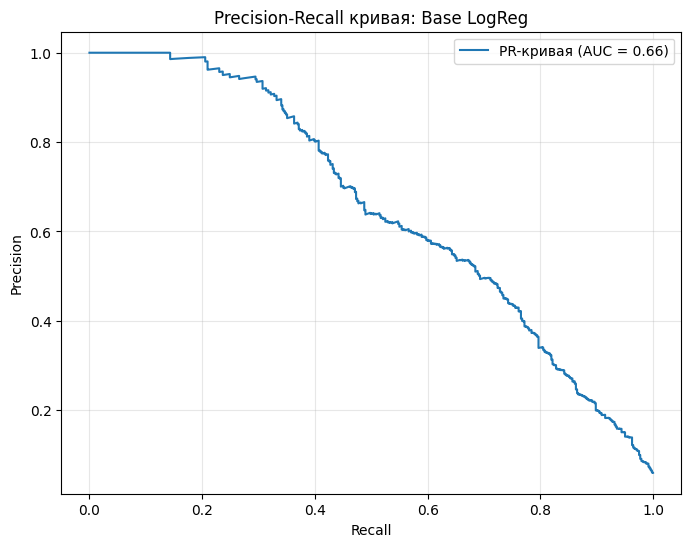

[Base LogReg] PR-AUC: 0.6562
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
num__app_crashes_last_month,2.373535,2.373535
target__0,2.192913,2.192913
num__missingindicator_app_crashes_last_month,1.044107,1.044107
cat_none__subscription_status_basic,-0.647547,0.647547
num__order_frequency_month,0.603169,0.603169


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__missingindicator_discount_usage_rate,-0.015974,0.015974
num__missingindicator_coffee_preference_change,-0.015316,0.015316
ohe__last_coffee_type_robusta,-0.012556,0.012556
ohe__last_drink_size_nan,0.002254,0.002254
num__coffee_preference_change,0.001733,0.001733


In [224]:
base_pipe = build_pipeline(config)
evaluate_model(base_pipe, X_train_val, y_train_val, cv, name="Base LogReg")

Проверка модели без обработки пропусков

Размер обучающей выборки: (2115, 22)
Размер тестовой выборки: (529, 22)
Доля положительного класса в train: 0.059
Доля положительного класса в test: 0.059


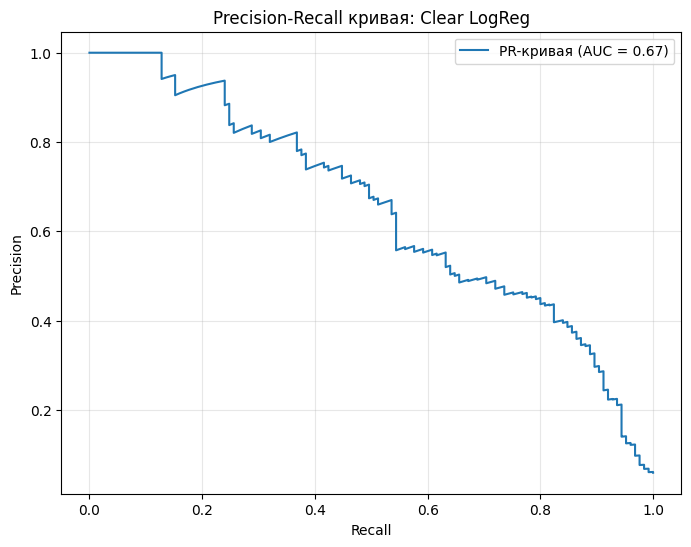

[Clear LogReg] PR-AUC: 0.6713
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
num__app_crashes_last_month,2.503287,2.503287
num__order_frequency_month,0.826831,0.826831
cat_none__milk_preference_none,-0.813780,0.813780
target__0,0.774821,0.774821
cat_none__subscription_status_pro,0.749733,0.749733


Топ-5 наименее влиятельных признаков


,importance,abs_importance
ohe__phone_type_ios,-0.037326,0.037326
num__coffee_preference_change,0.031115,0.031115
ohe__coffee_bean_origin_brazil,-0.015142,0.015142
ohe__last_drink_size_medium,0.007135,0.007135
ohe__last_coffee_type_arabica,0.000119,0.000119


In [225]:
clear_df = df.dropna()

clear_X_train_val, _, clear_y_train_val, _ = split_df(clear_df)
evaluate_model(base_pipe, clear_X_train_val, clear_y_train_val, cv, name="Clear LogReg")

Проверка гипотезы:
- Смотря на результаты матрицы корреляций, можно выделить самый влиятельный признак всего датасета с большим отрывом - app_crashes_last_month.

Тут могут быть два варианта такого исхода:

1. Действительно, признак оказывается сильное влияние на целевую переменную и его вес в функции должен быть больше всех остальных.

2. Существует вероятность того, что этот признак подглядывает в будущее или является частью определения целевой переменной. 
    
    - Для проверки второй гипотезы можно провести 2 эксперимента:
        
        1. Полностью исключить app_crashes_last_month, возможно, модель сможет лучше понимать закономерность, а не слепо следовать одному параметру.
        
        2. Попытка превратить числовой признак в категориальный и посмотреть на результаты анализа. Есть предположение, что пользователь не терпит зависаний приложений и уходит по этой причине, тогда стоит разделить признак на 3 категории: 0 багов - всё стабильно, 1-2 сбоя, 3+ - много сбоев, что ведёт к оттоку клиентов.

Размер обучающей выборки: (8028, 21)
Размер тестовой выборки: (2008, 21)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


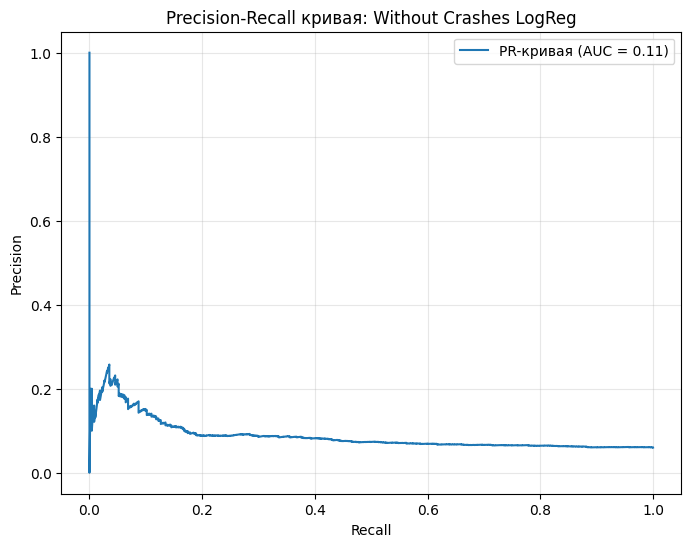

[Without Crashes LogReg] PR-AUC: 0.1082
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
target__0,3.605534,3.605534
cat_none__subscription_status_none,-0.434536,0.434536
ohe__last_coffee_type_blend,-0.405193,0.405193
cat_none__subscription_status_basic,-0.399275,0.399275
ohe__phone_type_nan,-0.377616,0.377616


Топ-5 наименее влиятельных признаков


,importance,abs_importance
review__missingindicator_review_rating_last_10,0.007251,0.007251
num__missingindicator_coffee_preference_change,0.006024,0.006024
num__missingindicator_days_since_last_order,-0.005651,0.005651
num__days_since_last_order,-0.004504,0.004504
num__missingindicator_app_opens_per_week,0.002702,0.002702


In [226]:
df_without_crashes = df.drop(columns=['app_crashes_last_month'])

corr_non_binary_df = get_non_binary_df(df_without_crashes)
without_crashes_config = FeatureConfig(
    numeric=corr_non_binary_df.columns,
    categorical=df_without_crashes.select_dtypes(include=['object']).columns,
    reviews=review_cols,
    cat_with_none=cat_cols_with_none,
    target_enc=['geo_location'],
)
without_crashes_pipe = build_pipeline(without_crashes_config)

X_train_val_w_c, _, y_train_val_w_c, _ = split_df(df_without_crashes)
evaluate_model(without_crashes_pipe, X_train_val_w_c, y_train_val_w_c, cv, name="Without Crashes LogReg")

Модель показала результат хуже. Значит идея не сработала

Попытка сделать из app_crashes_last_month категориальный параметр

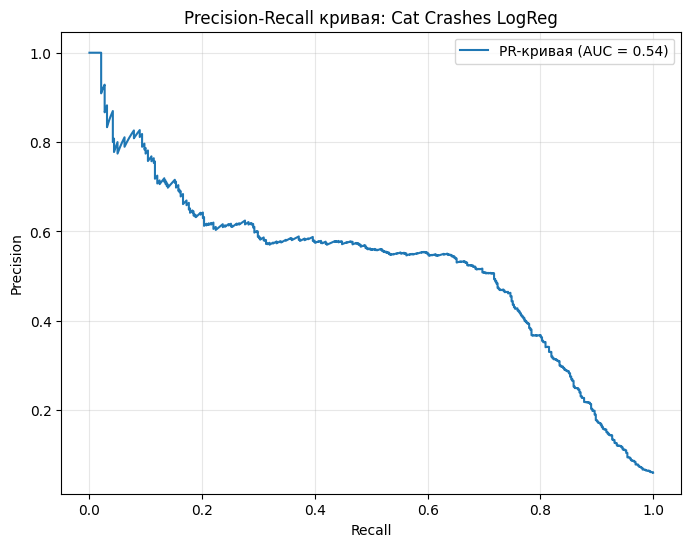

[Cat Crashes LogReg] PR-AUC: 0.5379
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
crashes__x0_cat_high,2.690505,2.690505
crashes__x0_cat_zero,-2.267045,2.267045
target__0,2.033003,2.033003
inverse__missingindicator_days_since_last_promo,-0.737112,0.737112
crashes__x0_cat_low,-0.672422,0.672422


Топ-5 наименее влиятельных признаков


,importance,abs_importance
ohe__preferred_roast_light,-0.015091,0.015091
num__missingindicator_app_opens_per_week,0.013407,0.013407
ohe__coffee_bean_origin_brazil,-0.007225,0.007225
ohe__last_coffee_type_robusta,-0.003708,0.003708
num__missingindicator_total_spent_last_month,0.002508,0.002508


In [227]:
crashes_cat_config = replace(
    config,
    crashes_cols=['app_crashes_last_month']
)

crashes_cat_pipe = build_pipeline(crashes_cat_config)
evaluate_model(crashes_cat_pipe, X_train_val, y_train_val, cv, name="Cat Crashes LogReg")

Результат модели оказался хуже, чем на данных без преобразований

Попытка удаления признаков, которые не коррелируют с целевой переменной

Размер обучающей выборки: (8028, 9)
Размер тестовой выборки: (2008, 9)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


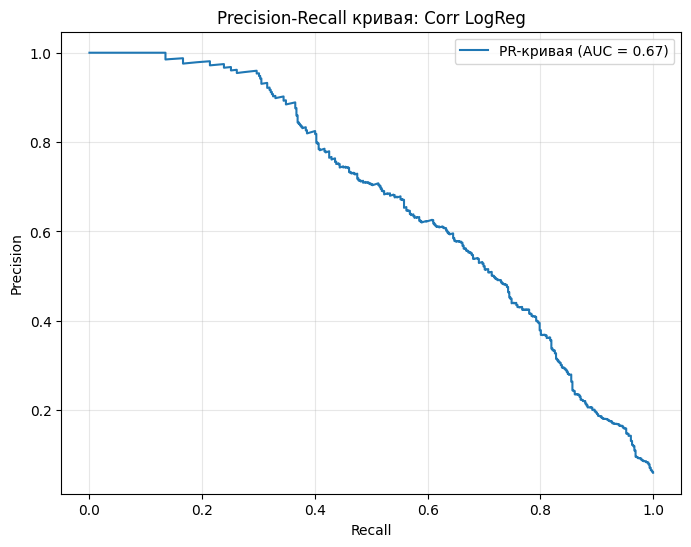

[Corr LogReg] PR-AUC: 0.6745
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
target__0,2.336837,2.336837
num__app_crashes_last_month,2.326209,2.326209
num__missingindicator_app_crashes_last_month,1.036032,1.036032
cat_none__subscription_status_basic,-0.627451,0.627451
cat_none__subscription_status_none,-0.572823,0.572823


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__discount_usage_rate,-0.034260,0.034260
num__missingindicator_app_opens_per_week,0.027964,0.027964
ohe__last_coffee_type_robusta,-0.019682,0.019682
num__missingindicator_total_spent_last_month,-0.018056,0.018056
num__missingindicator_discount_usage_rate,-0.005194,0.005194


In [228]:
corr_df = df.drop(columns=[
    'days_since_last_order', 
    'coffee_preference_change',
    'days_since_last_promo',
    'seasons',
    'median_order_value',
    'review_rating_last_1',
    'notifications_enabled',
    'preferred_roast',
    'milk_preference',
    'last_drink_size',
    'coffee_bean_origin',
    'seasonal_menu_tried',
    'phone_type'
])

corr_non_binary_df = get_non_binary_df(corr_df)
corr_config = FeatureConfig(
    numeric=corr_non_binary_df.columns,
    categorical=corr_df.select_dtypes(include=['object']).columns,
    reviews=['review_rating_last_10'],
    cat_with_none=['subscription_status'],
    target_enc=['geo_location'],
)
corr_pipe = build_pipeline(corr_config)

corr_X_train_val, _, corr_y_train_val, _ = split_df(corr_df)
evaluate_model(corr_pipe, corr_X_train_val, corr_y_train_val, cv, name="Corr LogReg")

Удаление некоррелируемых признаков действительно привел к улучшению модели, но как было сказано в блоке корреляций, итоговое удаление будет после попытки создания таких супер-параметров, которые смогут быть полезны моделе для предсказания целевой переменной

## Этап 5. Создание новых признаков

1. Добавьте новые признаки, которые могут улучшить качество модели. Опирайтесь на наработки, полученные в ходе исследовательского анализа данных, и на логику решаемой задачи.

   - Извлечение квадратного корня поможет сгладить большие значения.

   - Возведение в квадрат усилит влияние больших значений.

2. Обновите пайплайн для работы с новыми признаками, проведите повторную кросс-валидацию, сравните результаты моделей с новыми признаками и без них.

3. Интерпретируйте коэффициенты модели, а затем на их основании выявите значимые признаки и удалите лишние для модели.

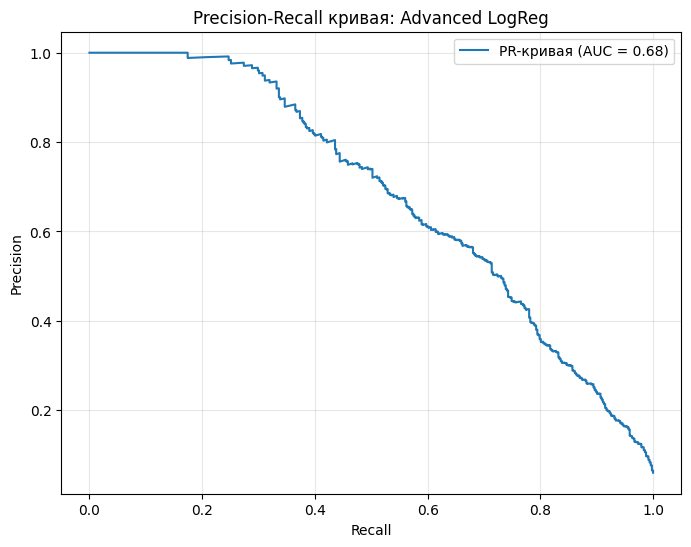

[Advanced LogReg] PR-AUC: 0.6843
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
target__0,2.128334,2.128334
sq__app_crashes_last_month,1.963637,1.963637
log__app_opens_per_week,1.110199,1.110199
log__missingindicator_app_opens_per_week,0.832400,0.832400
interact_0__0,0.771882,0.771882


Топ-5 наименее влиятельных признаков


,importance,abs_importance
num__missingindicator_coffee_preference_change,-0.020414,0.020414
num__missingindicator_discount_usage_rate,-0.017273,0.017273
num__notifications_enabled,-0.004371,0.004371
num__coffee_preference_change,0.003655,0.003655
cat_none__milk_preference_oat,0.003138,0.003138


In [229]:
advanced_config = replace(
    config,
    log_cols=['total_spent_last_month', 'app_opens_per_week', 'median_order_value'],
    sq_cols=['app_crashes_last_month'],
    interaction_pairs=[('subscription_status', 'last_drink_size'), ('seasons', 'last_drink_size')]
)

advanced_pipe = build_pipeline(advanced_config, use_interactions=True)
evaluate_model(advanced_pipe, X_train_val, y_train_val, cv, name="Advanced LogReg")

Размер обучающей выборки: (8028, 10)
Размер тестовой выборки: (2008, 10)
Доля положительного класса в train: 0.060
Доля положительного класса в test: 0.060


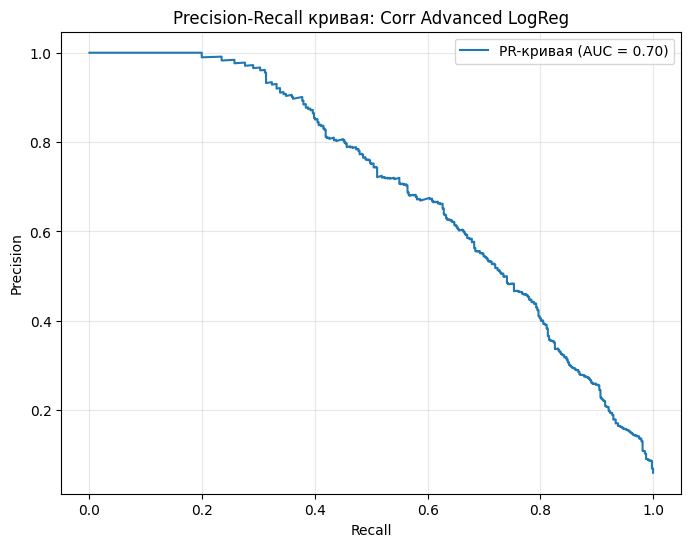

[Corr Advanced LogReg] PR-AUC: 0.7004
Топ-5 наиболее влиятельных признаков


,importance,abs_importance
target__0,2.208214,2.208214
sq__app_crashes_last_month,1.920627,1.920627
log__app_opens_per_week,1.056210,1.056210
interact_0__0,0.821533,0.821533
log__missingindicator_app_opens_per_week,0.786693,0.786693


Топ-5 наименее влиятельных признаков


,importance,abs_importance
log__missingindicator_total_spent_last_month,-0.136655,0.136655
cat_none__subscription_status_premium,-0.113291,0.113291
review__missingindicator_review_rating_last_10,0.064743,0.064743
ohe__last_drink_size_nan,-0.060596,0.060596
ohe__last_coffee_type_robusta,0.022765,0.022765


In [230]:
corr_ad_df = df.drop(columns=[
    # Удаление признаков по матрице корреляций
    'days_since_last_order', 
    'coffee_preference_change',
    'days_since_last_promo',
    'median_order_value',
    'review_rating_last_1',
    'notifications_enabled',
    'preferred_roast',
    'milk_preference',
    'coffee_bean_origin',
    'seasonal_menu_tried',
    'phone_type',
    
    # Удаление признака по результатам вывода значимости весов
    'discount_usage_rate'
])

corr_ad_non_binary_df = get_non_binary_df(corr_ad_df)
corr_ad_config = FeatureConfig(
    numeric=corr_ad_non_binary_df.columns,
    categorical=corr_ad_df.select_dtypes(include=['object']).columns,
    reviews=['review_rating_last_10'],
    cat_with_none=['subscription_status'],
    target_enc=['geo_location'],
    log_cols=['total_spent_last_month', 'app_opens_per_week'],
    sq_cols=['app_crashes_last_month'],
    interaction_pairs=[('subscription_status', 'last_drink_size'), ('seasons', 'last_drink_size')]
)
corr_advanced_pipe = build_pipeline(corr_ad_config, use_interactions=True)

corr_ad_X_train_val, _, corr_ad_y_train_val, _ = split_df(corr_ad_df)
evaluate_model(corr_advanced_pipe, corr_ad_X_train_val, corr_ad_y_train_val, cv, name="Corr Advanced LogReg")

Остальные признаки не будут подвержаны удалению по причине того, что они являются частью более сложного признака, который в своих других вариациях имеет значительный вес

## Этап 6. Эксперименты с гиперпараметрами

1. Перечислите все гиперпараметры, с которыми планируете экспериментировать.

2. Проведите систематический перебор гиперпараметров для `LogisticRegression`, выполните кросс-валидацию для каждой конфигурации.

3. Составьте таблицу с результатами.

4. Выберите лучшую модель, ориентируясь на заданную метрику качества.

In [231]:
param_grid = [
    {
        'model__solver': ['saga'],
        'model__l1_ratio': [0.0, 0.5, 1.0], 
        'model__C': [0.01, 1, 10],
        'model__max_iter': [4000]
    }
]

grid_search = GridSearchCV(
    estimator=corr_advanced_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='average_precision',
    n_jobs=-1,
    verbose=1,
    return_train_score=False
)

print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train_val, y_train_val)

Начинаем подбор гиперпараметров...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'model__C': [0.01, 1, ...], 'model__l1_ratio': [0.0, 0.5, ...], 'model__max_iter': [4000], 'model__solver': ['saga']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'average_precision'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the com

In [232]:
results_df = pd.DataFrame(grid_search.cv_results_)

columns_to_show = [
    'param_model__l1_ratio', 
    'param_model__C', 
    'mean_test_score', 
    'std_test_score',
    'rank_test_score'
]

results_table = results_df[columns_to_show].sort_values(by='rank_test_score')
results_table.columns = ['L1 Ratio', 'C', 'PR-AUC', 'Std Dev', 'Ранг']

print("Топ-5 лучших конфигураций:")
print(results_table.head(5))


Топ-5 лучших конфигураций:
   L1 Ratio      C    PR-AUC   Std Dev  Ранг
3       0.0   1.00  0.700530  0.045930     1
4       0.5   1.00  0.700367  0.045675     2
0       0.0   0.01  0.696000  0.046296     3
6       0.0  10.00  0.695603  0.044196     4
5       1.0   1.00  0.695379  0.044443     5


## Этап 7. Подготовка финальной модели

Объедините лучшую конфигурацию гиперпараметров с оптимальным набором признаков. Обучите модель на всех данных для кросс-валидации и проведите финальную оценку на отложенной тестовой выборке.


In [233]:
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат валидации (PR-AUC): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

def final_check(best_model, X_test, y_test, manual_threshold=None):
    y_proba = best_model.predict_proba(X_test)[:, 1]

    score = average_precision_score(y_test, y_proba)
    print(f"PR-AUC (Average Precision): {score:.4f}")
    
    create_PR_curve_graph(y_test, y_proba, score, 'Финальная модель')

    if manual_threshold is not None:
        best_thresh = manual_threshold
        print(f"Используем заданный порог: {best_thresh}")
    else:
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
        
        f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
        
        best_idx = np.argmax(f1_scores[:-1])
        best_thresh = thresholds[best_idx]
        
        print(f"Оптимальный порог: {best_thresh:.4f}")
        print(f"Максимальный F1-score: {f1_scores[best_idx]:.4f}")

    y_pred_custom = (y_proba >= best_thresh).astype(int)

    print("Результаты на тесте с новым порогом")
    print(classification_report(y_test, y_pred_custom))
    
    print("Матрица ошибок")
    print(confusion_matrix(y_test, y_pred_custom))

Лучшие параметры: {'model__C': 1, 'model__l1_ratio': 0.0, 'model__max_iter': 4000, 'model__solver': 'saga'}
Лучший результат валидации (PR-AUC): 0.7005


PR-AUC (Average Precision): 0.7521


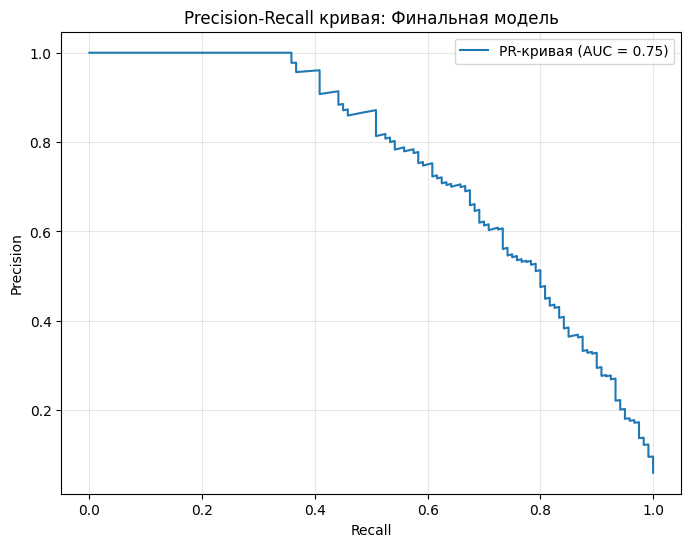

Оптимальный порог: 0.3832
Максимальный F1-score: 0.6838
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1888
         1.0       0.70      0.67      0.68       120

    accuracy                           0.96      2008
   macro avg       0.84      0.82      0.83      2008
weighted avg       0.96      0.96      0.96      2008

Матрица ошибок
[[1854   34]
 [  40   80]]


In [234]:
final_check(grid_search.best_estimator_, X_test, y_test)

## Этап 8. Отчёт о проделанной работе

Проанализируйте итоговые метрики модели и факторы, которые на них повлияли. Составьте описание, выделив наиболее важные факторы.

## Этап 9. Сохранение модели для продакшена

Сохраните итоговую модель и пайплайн предобработки. Убедитесь, что всё работает: загрузите артефакты и проверьте их на тестовых данных. В решении укажите ссылку для скачивания сохранённых файлов.

In [235]:
file_name = 'customer_churn_prediction.joblib'

joblib.dump(best_model, file_name)
print(f"Объект сохранён в файл {file_name}") 

Объект сохранён в файл customer_churn_prediction.joblib


PR-AUC (Average Precision): 0.7521


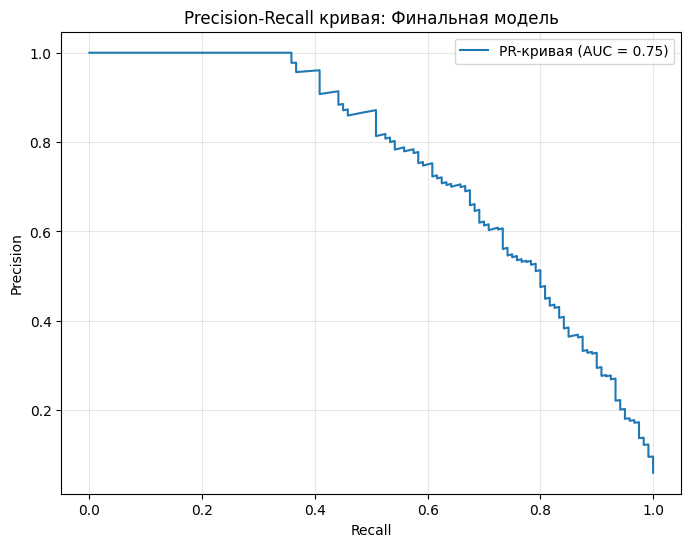

Оптимальный порог: 0.3832
Максимальный F1-score: 0.6838
Результаты на тесте с новым порогом
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1888
         1.0       0.70      0.67      0.68       120

    accuracy                           0.96      2008
   macro avg       0.84      0.82      0.83      2008
weighted avg       0.96      0.96      0.96      2008

Матрица ошибок
[[1854   34]
 [  40   80]]


In [236]:
model = joblib.load('customer_churn_prediction.joblib')
final_check(model, X_test, y_test)

Сервис на основе обученной модели

In [237]:
class ChurnModelService:
    def __init__(self, model_path='customer_churn_prediction.joblib', threshold=0.3832):
        self.model = joblib.load(model_path)
        self.threshold = threshold
    
    def predict_churn(self, X):
        probs = self.model.predict_proba(X)[:, 1]
        predictions = (probs >= self.threshold).astype(int)
        
        return predictions, probs

In [238]:
row_idx = 7
sample = df.iloc[[row_idx]].copy()

actual_value = sample['churn'].values[0]
test = sample.drop(columns='churn')

service = ChurnModelService()
is_churn, risk_score = service.predict_churn(test)

print(f"Клиент может уйти: {'Да' if is_churn else 'Нет'}")
print(f'Уверенность в ответе: {round(risk_score[0] * 100, 2)}')

Клиент может уйти: Да
Уверенность в ответе: 69.06
